# Vehicle Insurance Claim Fraud Detection (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Preprocessing Data

In [3]:
# Read Data
vic = pd.read_csv('Datasets/fraud_oracle.csv')
vic.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [4]:
vic.shape

(15420, 33)

In [5]:
vic.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


This dataset has 9 numerical features

In [6]:
vic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [7]:
# Checking Data for find missing value
vic.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [8]:
vic.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [9]:
vic.nunique()

Month                      12
WeekOfMonth                 5
DayOfWeek                   7
Make                       19
AccidentArea                2
DayOfWeekClaimed            8
MonthClaimed               13
WeekOfMonthClaimed          5
Sex                         2
MaritalStatus               4
Age                        66
Fault                       2
PolicyType                  9
VehicleCategory             3
VehiclePrice                6
FraudFound_P                2
PolicyNumber            15420
RepNumber                  16
Deductible                  4
DriverRating                4
Days_Policy_Accident        5
Days_Policy_Claim           4
PastNumberOfClaims          4
AgeOfVehicle                8
AgeOfPolicyHolder           9
PoliceReportFiled           2
WitnessPresent              2
AgentType                   2
NumberOfSuppliments         4
AddressChange_Claim         5
NumberOfCars                5
Year                        3
BasePolicy                  3
dtype: int

In [10]:
vic_temp = vic.copy()

In [11]:
vic_temp[vic_temp['Age'] == 0].shape

(320, 33)

In [12]:
vic_temp[vic_temp['Age'] == 0]['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [13]:
# Because 320 of the samples have an age of zero, we fill them with the mean of 16 and 17
vic_temp['Age'] = vic_temp['Age'].replace(0, 16.5)

In [14]:
vic_temp[vic_temp['DayOfWeekClaimed'] == '0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [15]:
# Because Day Of Week Claimed and Month Claimed of above sample is 0 we remove it.
vic_temp.drop(1516, axis=0, inplace=True)
vic_temp.shape

(15419, 33)

In [16]:
vic_temp['PolicyNumber'].value_counts()

1        1
10361    1
10273    1
10274    1
10275    1
        ..
5146     1
5147     1
5148     1
5149     1
15420    1
Name: PolicyNumber, Length: 15419, dtype: int64

In [17]:
# Beacuse Policy number is a row number remove this column
vic_temp.drop(columns='PolicyNumber', inplace=True)
vic_temp.shape

(15419, 32)

In [18]:
corr_mat = vic_temp.corr()
corr_mat

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.007719,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001411,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.007719,0.001411,1.000000,-0.027509,-0.006357,0.069036,0.001264,0.022278
FraudFound_P,-0.011872,-0.005783,-0.027509,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.006357,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.069036,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.001264,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.022278,-0.024778,0.009438,-0.001182,-0.013922,1.000000


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_5714/3087650146.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

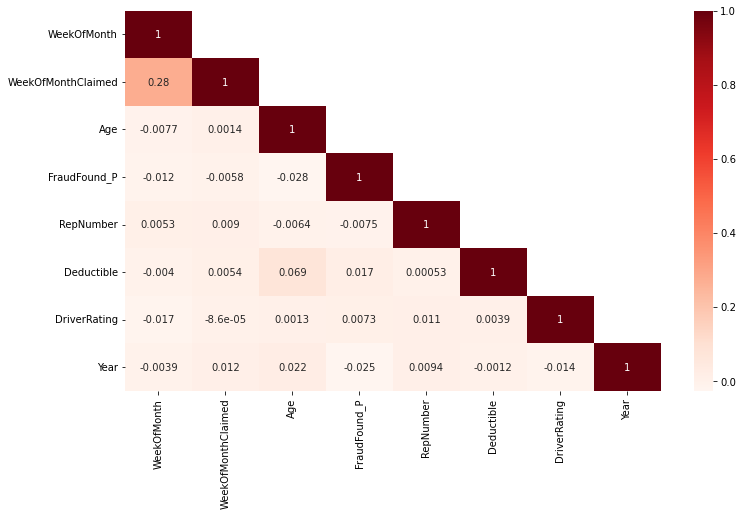

In [19]:
plt.figure(figsize=(12, 7))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

In [20]:
for labels, content in vic_temp.items():
    if pd.api.types.is_string_dtype(content):
        vic_temp[labels] = content.astype('category').cat.as_ordered()

In [21]:
vic_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15419 entries, 0 to 15419
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Month                 15419 non-null  category
 1   WeekOfMonth           15419 non-null  int64   
 2   DayOfWeek             15419 non-null  category
 3   Make                  15419 non-null  category
 4   AccidentArea          15419 non-null  category
 5   DayOfWeekClaimed      15419 non-null  category
 6   MonthClaimed          15419 non-null  category
 7   WeekOfMonthClaimed    15419 non-null  int64   
 8   Sex                   15419 non-null  category
 9   MaritalStatus         15419 non-null  category
 10  Age                   15419 non-null  float64 
 11  Fault                 15419 non-null  category
 12  PolicyType            15419 non-null  category
 13  VehicleCategory       15419 non-null  category
 14  VehiclePrice          15419 non-null  category
 15  Fr

In [22]:
for labels, content in vic_temp.items():
    if not pd.api.types.is_numeric_dtype(content):
        vic_temp[labels] = pd.Categorical(content).codes

In [23]:
vic_temp.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1


In [24]:
vic_temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,15419.0,5.532136,3.409703,0.0,3.0,6.0,8.0,11.0
WeekOfMonth,15419.0,2.788637,1.287611,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15419.0,2.915883,2.055494,0.0,1.0,3.0,5.0,6.0
Make,15419.0,10.114858,5.282987,0.0,6.0,9.0,13.0,18.0
AccidentArea,15419.0,0.896426,0.304716,0.0,1.0,1.0,1.0,1.0
DayOfWeekClaimed,15419.0,3.203061,2.273766,0.0,1.0,4.0,5.0,6.0
MonthClaimed,15419.0,5.596148,3.410648,0.0,3.0,6.0,9.0,11.0
WeekOfMonthClaimed,15419.0,2.694079,1.259082,1.0,2.0,3.0,4.0,5.0
Sex,15419.0,0.843051,0.363765,0.0,1.0,1.0,1.0,1.0
MaritalStatus,15419.0,1.303327,0.475113,0.0,1.0,1.0,2.0,3.0


In [25]:
corr_mat = vic_temp.corr()
corr_mat

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
Month,1.000000,0.010625,-0.009549,0.000539,-0.000074,-0.025776,0.724419,0.042016,0.002916,-0.003956,...,-0.029181,0.010748,0.009986,-0.002107,0.015757,-0.010878,-0.007517,0.001341,0.028726,0.020484
WeekOfMonth,0.010625,1.000000,-0.011668,-0.001665,0.009002,0.015082,0.009982,0.275366,0.005332,0.019671,...,-0.014871,-0.002898,0.013020,0.013711,0.006472,-0.002867,0.008338,0.002511,-0.003949,-0.007818
DayOfWeek,-0.009549,-0.011668,1.000000,0.003321,0.006386,0.097647,-0.011997,-0.013954,-0.021214,-0.006547,...,0.004027,0.013165,-0.011908,0.000134,0.011516,-0.010873,-0.005148,0.001991,0.002549,0.014810
Make,0.000539,-0.001665,0.003321,1.000000,0.004127,-0.005187,0.010022,-0.007900,-0.026360,-0.010574,...,-0.052875,0.051961,-0.008083,-0.000490,-0.014913,-0.025168,-0.003390,-0.000226,0.010826,-0.019937
AccidentArea,-0.000074,0.009002,0.006386,0.004127,1.000000,-0.011394,-0.002618,0.006330,-0.033732,0.003321,...,-0.012278,0.007301,0.001722,-0.028385,-0.005214,0.005229,0.003755,-0.007856,0.002079,0.043560
DayOfWeekClaimed,-0.025776,0.015082,0.097647,-0.005187,-0.011394,1.000000,-0.015803,0.013635,-0.000203,-0.018055,...,-0.006408,0.008432,-0.018389,-0.001396,-0.015393,0.019484,0.011260,-0.010448,0.003512,-0.014472
MonthClaimed,0.724419,0.009982,-0.011997,0.010022,-0.002618,-0.015803,1.000000,0.032428,-0.002160,-0.007772,...,-0.021446,0.018572,0.013989,-0.008597,0.016148,0.001483,-0.013373,-0.001811,0.020948,0.028162
WeekOfMonthClaimed,0.042016,0.275366,-0.013954,-0.007900,0.006330,0.013635,0.032428,1.000000,0.003777,0.000411,...,0.004001,0.001091,0.023497,0.009363,-0.011326,-0.007022,-0.008322,0.008224,0.012082,0.013671
Sex,0.002916,0.005332,-0.021214,-0.026360,-0.033732,-0.000203,-0.002160,0.003777,1.000000,-0.114441,...,0.209081,0.065569,-0.007408,-0.005583,0.012685,0.001927,0.004429,0.000089,0.000444,-0.069729
MaritalStatus,-0.003956,0.019671,-0.006547,-0.010574,0.003321,-0.018055,-0.007772,0.000411,-0.114441,1.000000,...,-0.304444,-0.453924,0.011780,0.013870,0.007592,0.016658,-0.009557,-0.008284,-0.013893,0.048131


/var/folders/9y/vw5physn1xj4wpb41wh0q6gh0000gn/T/ipykernel_5714/1290100022.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))


<AxesSubplot:>

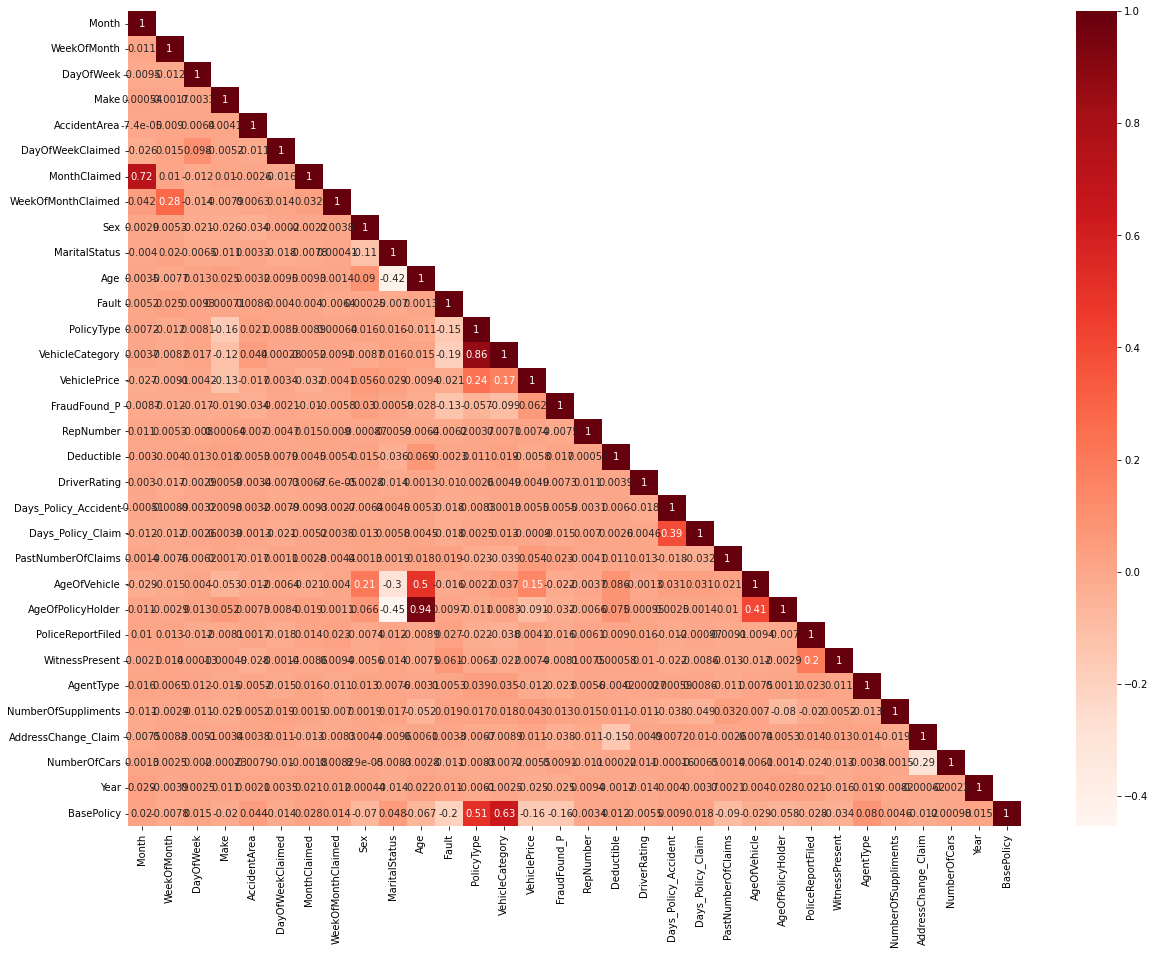

In [26]:
plt.figure(figsize=(20, 15))
corr_mat = corr_mat.where(np.tril(np.ones(corr_mat.shape)).astype(np.bool))
sns.heatmap(corr_mat, annot=True, cmap='Reds')

### Spliting Data

In [27]:
X = vic_temp.drop(columns='FraudFound_P').copy()
y = vic_temp['FraudFound_P'].copy()

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, stratify=y)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(12335, 31) (3084, 31) (12335,) (3084,)


In [30]:
y_train.value_counts()

0    11597
1      738
Name: FraudFound_P, dtype: int64

In [31]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

#### Functions for Analysis a Model

In [32]:
model_name_test, accuracy_test, recall_test, precision_test, f1_test, roc_auc_test = [], [], [], [], [], []

In [33]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)

    model_name_test.append(modelname)
    accuracy_test.append(accuracy_score(y_test, y_pred))
    f1_test.append(f1_score(y_test, y_pred))
    recall_test.append(recall_score(y_test, y_pred))
    precision_test.append(precision_score(y_test, y_pred))
    roc_auc_test.append(roc_auc_score(y_test, y_pred))

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)

    # ROC AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_test, y_pred))

In [34]:
model_name_train, accuracy_train, recall_train, precision_train, f1_train, roc_auc_train = [], [], [], [], [], []

In [35]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)

    model_name_train.append(modelname)
    accuracy_train.append(accuracy_score(y_train, y_pred))
    f1_train.append(f1_score(y_train, y_pred))
    recall_train.append(recall_score(y_train, y_pred))
    precision_train.append(precision_score(y_train, y_pred))
    roc_auc_train.append(roc_auc_score(y_train, y_pred))

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_pred))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    # ROC AUC
    fpr, tpr, _ = roc_curve(y_train, y_pred)

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    ax[1].plot(fpr, tpr), ax[1].set_title('ROC AUC'), ax[1].set_xlabel('False Positive Rate'), ax[1].set_ylabel('True Positive Rate')
    plt.show()
    print(classification_report(y_train, y_pred))

### Training Model Without under and over sampling

#### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [36]:
logistic_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


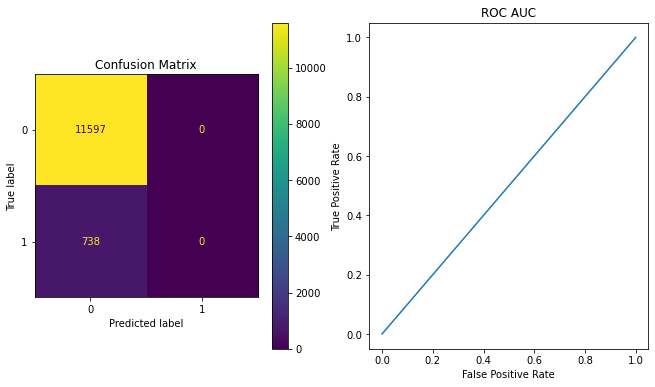

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
analysis_model_with_train('logistic_model', logistic_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


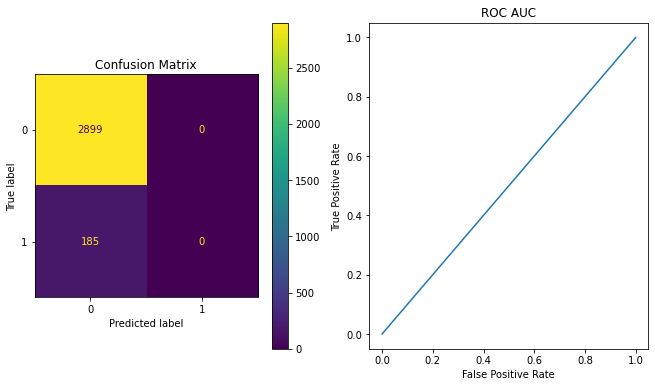

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
analysis_model_with_test('logistic_model', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [39]:
from sklearn.svm import LinearSVC
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [40]:
linearSVC_model.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9401702472638832
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


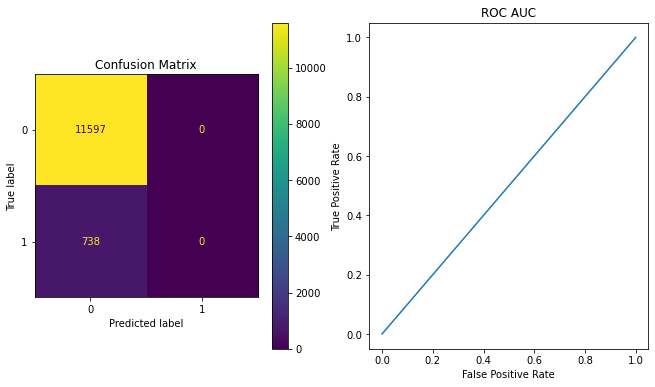

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       0.00      0.00      0.00       738

    accuracy                           0.94     12335
   macro avg       0.47      0.50      0.48     12335
weighted avg       0.88      0.94      0.91     12335



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
analysis_model_with_train('linearSVC_model', linearSVC_model, x_train, y_train)

/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


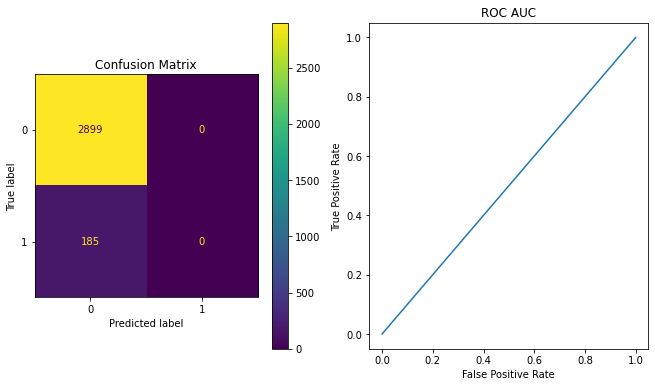

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
analysis_model_with_test('linearSVC_model', linearSVC_model, x_test, y_test)

#### SVC

In [43]:
from sklearn.svm import SVC
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, coef0=1, C=5))

In [44]:
poly_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

Accuracy Score: 0.9588974462910418
F1 Score: 0.47893114080164434
Recall Score: 0.3157181571815718
Precision Score: 0.9914893617021276
ROC AUC: 0.6577728493935797


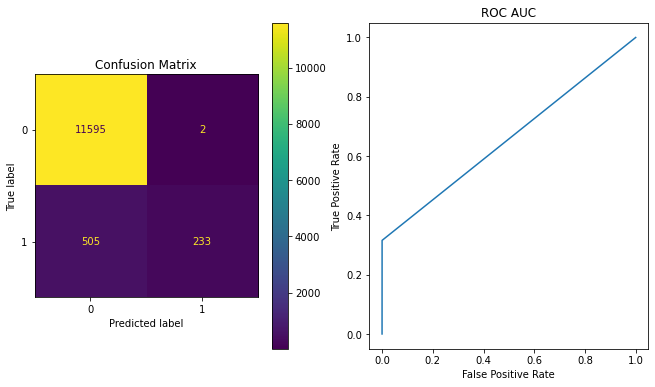

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11597
           1       0.99      0.32      0.48       738

    accuracy                           0.96     12335
   macro avg       0.97      0.66      0.73     12335
weighted avg       0.96      0.96      0.95     12335



In [45]:
analysis_model_with_train('poly_kernel_svm_clf', poly_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9309338521400778
F1 Score: 0.11618257261410789
Recall Score: 0.07567567567567568
Precision Score: 0.25
ROC AUC: 0.5305939606388038


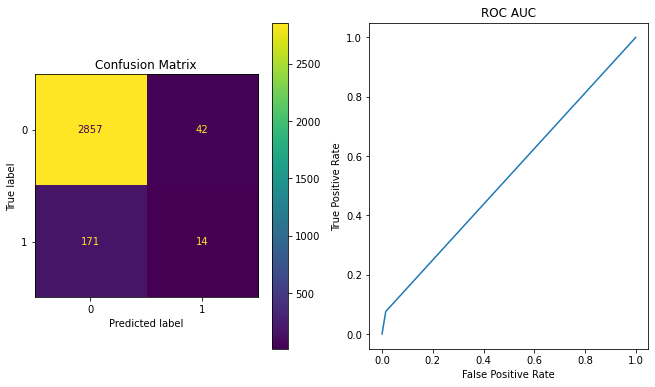

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2899
           1       0.25      0.08      0.12       185

    accuracy                           0.93      3084
   macro avg       0.60      0.53      0.54      3084
weighted avg       0.90      0.93      0.91      3084



In [46]:
analysis_model_with_test('poly_kernel_svm_clf', poly_kernel_svm_clf, x_test, y_test)

In [47]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [48]:
rbf_kernel_svm_clf.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.941305229023105
F1 Score: 0.03723404255319149
Recall Score: 0.018970189701897018
Precision Score: 1.0
ROC AUC: 0.5094850948509485


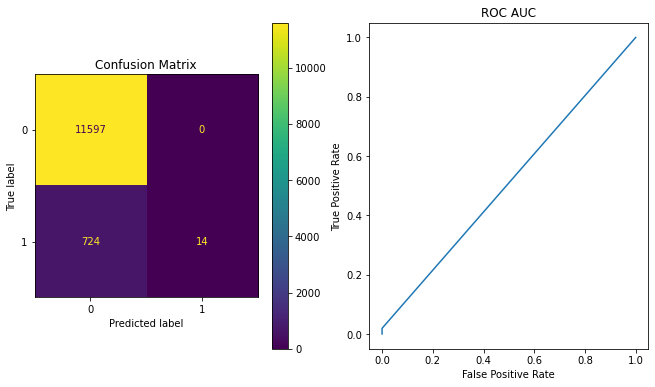

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11597
           1       1.00      0.02      0.04       738

    accuracy                           0.94     12335
   macro avg       0.97      0.51      0.50     12335
weighted avg       0.94      0.94      0.91     12335



In [49]:
analysis_model_with_train('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_train, y_train)

Accuracy Score: 0.9400129701686122
F1 Score: 0.0
Recall Score: 0.0
Precision Score: 0.0
ROC AUC: 0.5


/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


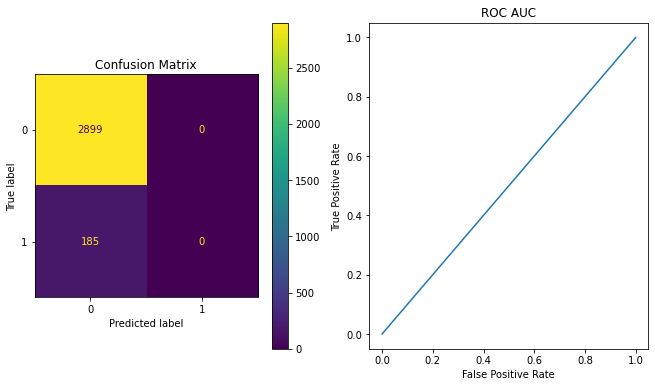

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2899
           1       0.00      0.00      0.00       185

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mohammad/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
analysis_model_with_test('rbf_kernel_svm_clf', rbf_kernel_svm_clf, x_test, y_test)

### Training Model with Under Sampling

In [45]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [46]:
under_sampler = Pipeline([('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5))])
x_under, y_under = under_sampler.fit_resample(x_train, y_train)
print(x_under.shape, y_under.shape)

(3477, 31) (3477,)


In [48]:
y_under.value_counts()

0    2318
1    1159
Name: FraudFound_P, dtype: int64

In [49]:
y_test.value_counts()

0    2899
1     185
Name: FraudFound_P, dtype: int64

#### Logistic Regression

In [50]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [52]:
logistic_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.7641645096347426
F1 Score: 0.6409807355516636
Recall Score: 0.631578947368421
Precision Score: 0.6506666666666666
ROC AUC: 0.7310181190681622


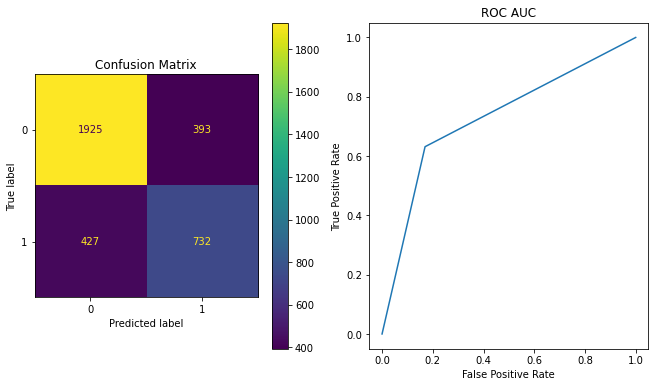

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2318
           1       0.65      0.63      0.64      1159

    accuracy                           0.76      3477
   macro avg       0.73      0.73      0.73      3477
weighted avg       0.76      0.76      0.76      3477



In [53]:
analysis_model_with_train('logistic_model_under', logistic_model, x_under, y_under)

Accuracy Score: 0.7947470817120622
F1 Score: 0.2327272727272727
Recall Score: 0.518918918918919
Precision Score: 0.15
ROC AUC: 0.6656340024053028


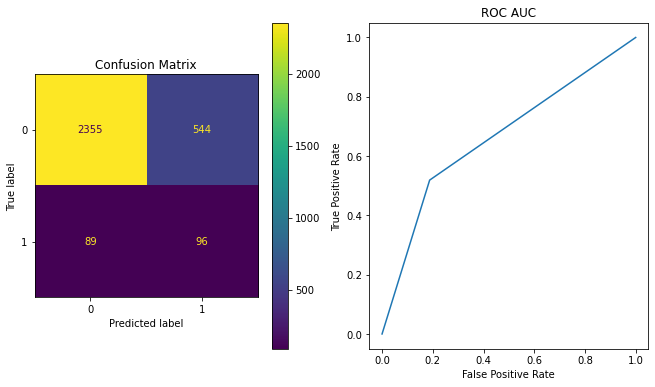

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2899
           1       0.15      0.52      0.23       185

    accuracy                           0.79      3084
   macro avg       0.56      0.67      0.56      3084
weighted avg       0.91      0.79      0.84      3084



In [54]:
analysis_model_with_test('logistic_model_under', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [56]:
from sklearn.svm import LinearSVC

In [57]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [58]:
linearSVC_model.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.7647397181478286
F1 Score: 0.6452732003469211
Recall Score: 0.6419327006039689
Precision Score: 0.6486486486486487
ROC AUC: 0.7340379637618636


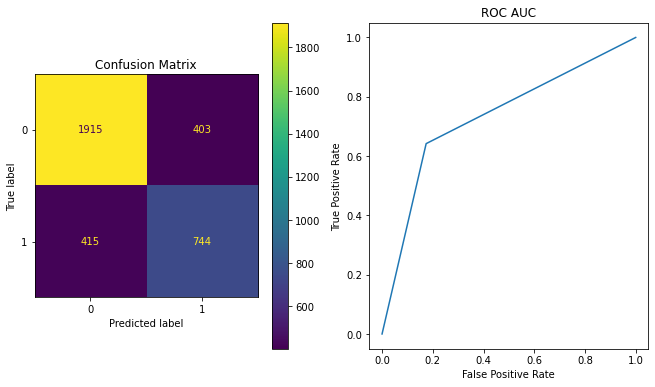

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      2318
           1       0.65      0.64      0.65      1159

    accuracy                           0.76      3477
   macro avg       0.74      0.73      0.73      3477
weighted avg       0.76      0.76      0.76      3477



In [63]:
analysis_model_with_train('linearSVC_model_under', linearSVC_model, x_under, y_under)

Accuracy Score: 0.7892347600518806
F1 Score: 0.22802850356294535
Recall Score: 0.518918918918919
Precision Score: 0.1461187214611872
ROC AUC: 0.6627019568723604


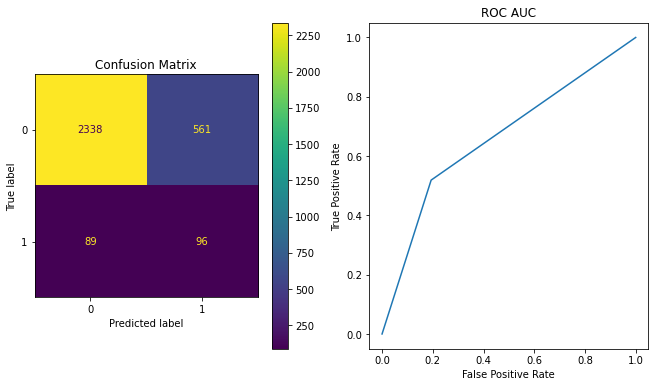

              precision    recall  f1-score   support

           0       0.96      0.81      0.88      2899
           1       0.15      0.52      0.23       185

    accuracy                           0.79      3084
   macro avg       0.55      0.66      0.55      3084
weighted avg       0.91      0.79      0.84      3084



In [60]:
analysis_model_with_test('linearSVC_model_under', linearSVC_model, x_test, y_test)

#### SVC

In [61]:
from sklearn.svm import SVC

In [62]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=5))

In [64]:
poly_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='poly'))])

Accuracy Score: 0.9272361230946218
F1 Score: 0.8872046366473473
Recall Score: 0.8584987057808455
Precision Score: 0.9178966789667896
ROC AUC: 0.9100517687661778


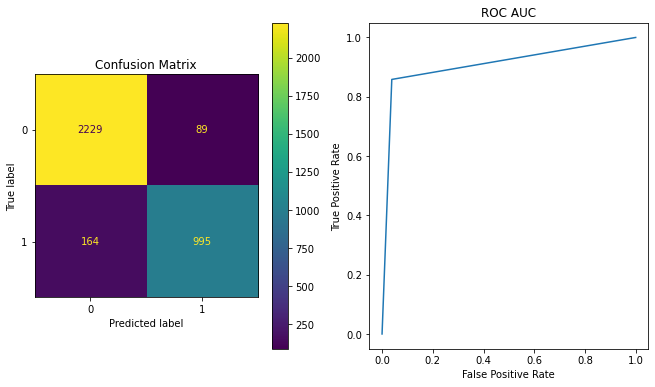

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2318
           1       0.92      0.86      0.89      1159

    accuracy                           0.93      3477
   macro avg       0.92      0.91      0.92      3477
weighted avg       0.93      0.93      0.93      3477



In [65]:
analysis_model_with_train('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.819390402075227
F1 Score: 0.21879382889200563
Recall Score: 0.42162162162162165
Precision Score: 0.14772727272727273
ROC AUC: 0.6331978408211593


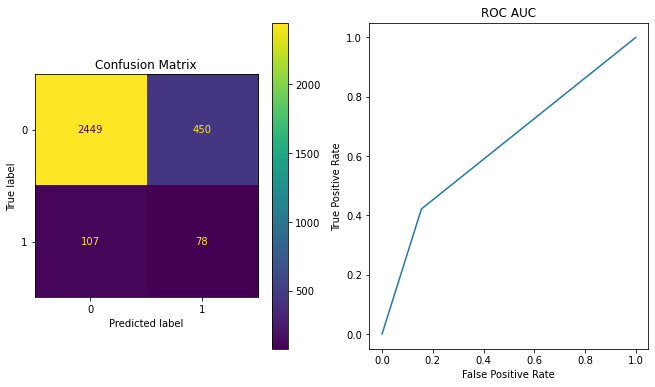

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2899
           1       0.15      0.42      0.22       185

    accuracy                           0.82      3084
   macro avg       0.55      0.63      0.56      3084
weighted avg       0.91      0.82      0.86      3084



In [66]:
analysis_model_with_test('poly_kernel_svm_clf_under', poly_kernel_svm_clf, x_test, y_test)

In [67]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma='auto'))

In [68]:
rbf_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Accuracy Score: 0.8648259994247914
F1 Score: 0.7907390917186109
Recall Score: 0.7661777394305436
Precision Score: 0.8169273229070837
ROC AUC: 0.8401639344262295


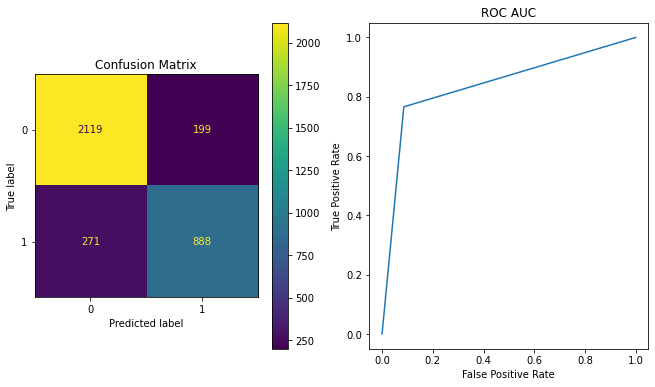

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2318
           1       0.82      0.77      0.79      1159

    accuracy                           0.86      3477
   macro avg       0.85      0.84      0.85      3477
weighted avg       0.86      0.86      0.86      3477



In [69]:
analysis_model_with_train('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.8326848249027238
F1 Score: 0.27932960893854747
Recall Score: 0.5405405405405406
Precision Score: 0.18832391713747645
ROC AUC: 0.6959342923468484


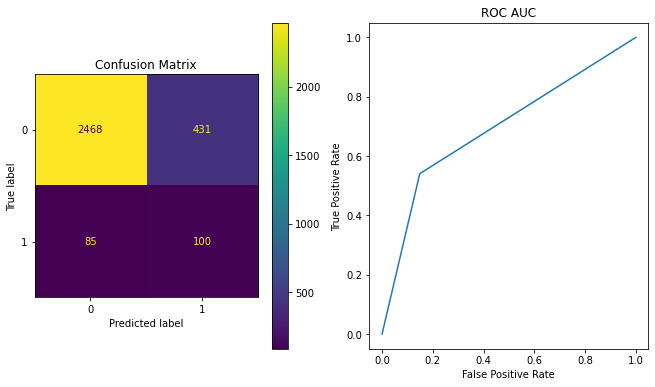

              precision    recall  f1-score   support

           0       0.97      0.85      0.91      2899
           1       0.19      0.54      0.28       185

    accuracy                           0.83      3084
   macro avg       0.58      0.70      0.59      3084
weighted avg       0.92      0.83      0.87      3084



In [70]:
analysis_model_with_test('rbf_kernel_svm_clf_under', rbf_kernel_svm_clf, x_test, y_test)

In [71]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid', gamma='auto'))

In [72]:
sigmoid_kernel_svm_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid'))])

Accuracy Score: 0.6914006327293644
F1 Score: 0.5373005605864597
Recall Score: 0.5375323554788611
Precision Score: 0.5370689655172414
ROC AUC: 0.6529335634167386


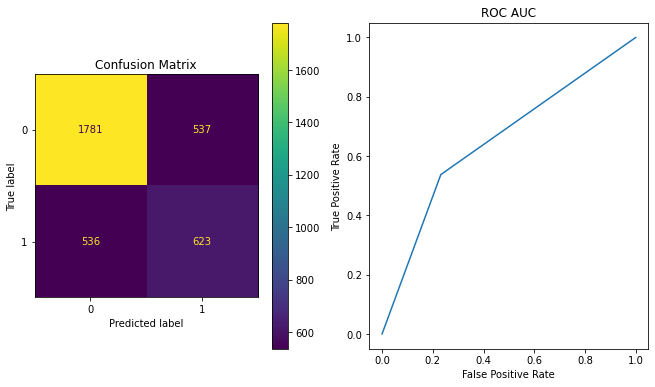

              precision    recall  f1-score   support

           0       0.77      0.77      0.77      2318
           1       0.54      0.54      0.54      1159

    accuracy                           0.69      3477
   macro avg       0.65      0.65      0.65      3477
weighted avg       0.69      0.69      0.69      3477



In [73]:
analysis_model_with_train('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_under, y_under)

Accuracy Score: 0.7746433203631647
F1 Score: 0.21997755331088667
Recall Score: 0.5297297297297298
Precision Score: 0.1388101983002833
ROC AUC: 0.6600011187455134


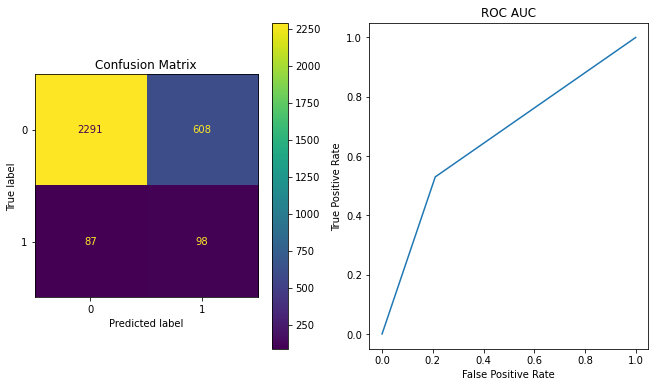

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2899
           1       0.14      0.53      0.22       185

    accuracy                           0.77      3084
   macro avg       0.55      0.66      0.54      3084
weighted avg       0.91      0.77      0.83      3084



In [74]:
analysis_model_with_test('sigmoid_kernel_svm_clf_under', sigmoid_kernel_svm_clf, x_test, y_test)

#### Grid Search CV on SVM

In [79]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [78]:
svm_model = SVC()

In [79]:
grid_parameters = {'C': [0.1, 1, 10, 100], 
                   'gamma': [1, 0.1, 0.01, 0.001],
                   'kernel': ['poly', 'rbf', 'sigmoid', 'linear']}

grid_search = GridSearchCV(estimator=svm_model, param_grid=grid_parameters, scoring='f1', cv=3)

#### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [76]:
decision_tree_clf.fit(x_under, y_under)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.7034800115041703
F1 Score: 0.6783151326053042
Recall Score: 0.9378774805867127
Precision Score: 0.5312805474095796
ROC AUC: 0.7620793787748059


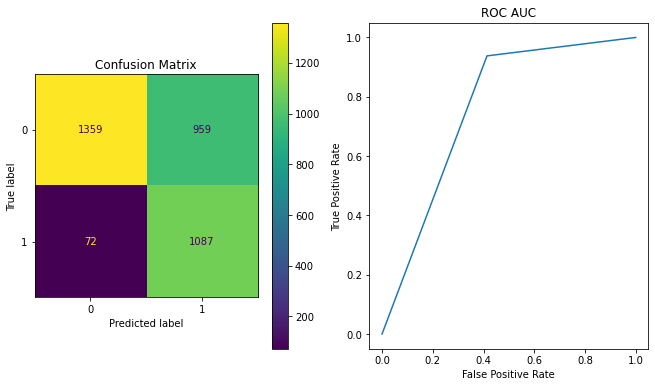

              precision    recall  f1-score   support

           0       0.95      0.59      0.72      2318
           1       0.53      0.94      0.68      1159

    accuracy                           0.70      3477
   macro avg       0.74      0.76      0.70      3477
weighted avg       0.81      0.70      0.71      3477



In [77]:
analysis_model_with_train('decision_tree_clf_under', decision_tree_clf, x_under, y_under)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


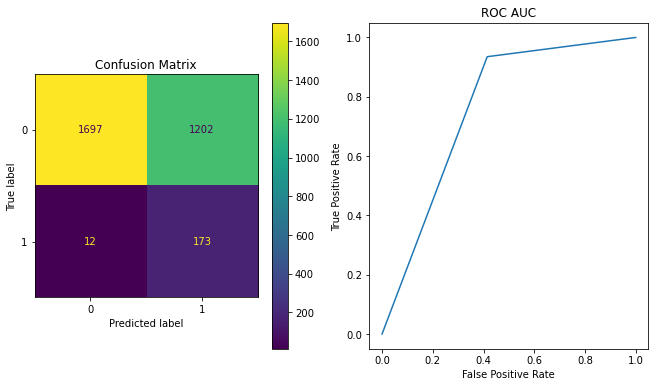

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [78]:
analysis_model_with_test('decision_tree_clf_under', decision_tree_clf, x_test, y_test)

#### Grid Search CV on Decisoin Tree

In [80]:
from sklearn.model_selection import GridSearchCV

In [104]:
grid_parameters = {'criterion':['gini','entropy'], 'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_parameters, cv=10, scoring='accuracy')

In [105]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='accuracy')

In [106]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6}

In [107]:
grid_search.best_score_

0.7751300142435986

Accuracy Score: 0.7903364969801553
F1 Score: 0.6781456953642384
Recall Score: 0.6626402070750647
Precision Score: 0.6943942133815552
ROC AUC: 0.7584124245038827


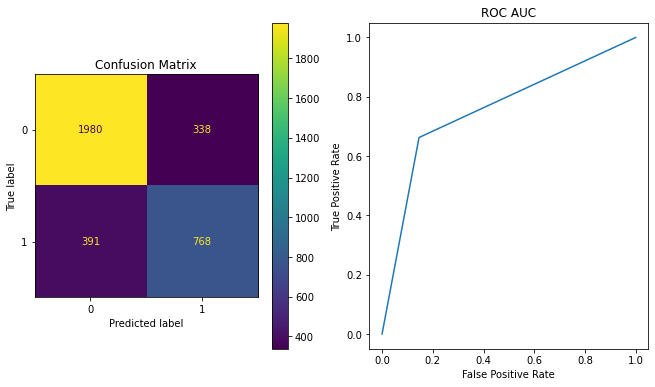

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2318
           1       0.69      0.66      0.68      1159

    accuracy                           0.79      3477
   macro avg       0.76      0.76      0.76      3477
weighted avg       0.79      0.79      0.79      3477



In [108]:
analysis_model_with_train('decision_tree_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8002594033722439
F1 Score: 0.23950617283950615
Recall Score: 0.5243243243243243
Precision Score: 0.1552
ROC AUC: 0.6710962773743042


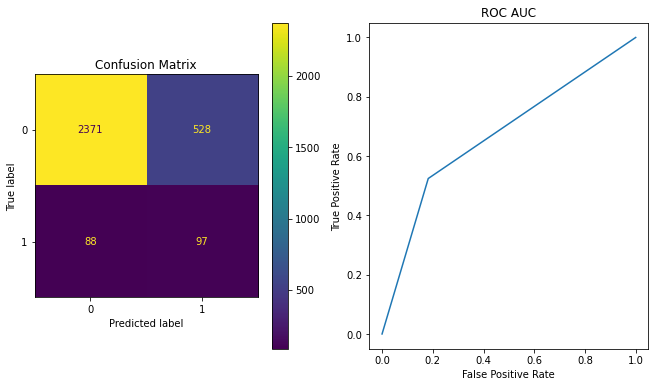

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2899
           1       0.16      0.52      0.24       185

    accuracy                           0.80      3084
   macro avg       0.56      0.67      0.56      3084
weighted avg       0.92      0.80      0.85      3084



In [109]:
analysis_model_with_test('decision_tree_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Random Forest

In [110]:
from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier()

In [111]:
random_forest_clf.fit(x_under, y_under)

RandomForestClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


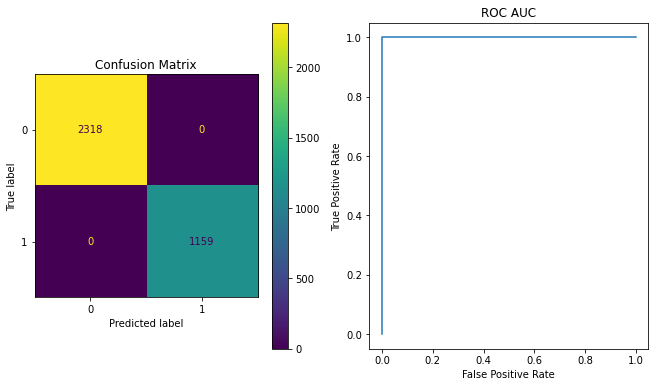

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [112]:
analysis_model_with_train('random_forest_clf_under', random_forest_clf, x_under, y_under)

Accuracy Score: 0.8608949416342413
F1 Score: 0.28140703517587934
Recall Score: 0.4540540540540541
Precision Score: 0.20388349514563106
ROC AUC: 0.6704557955679031


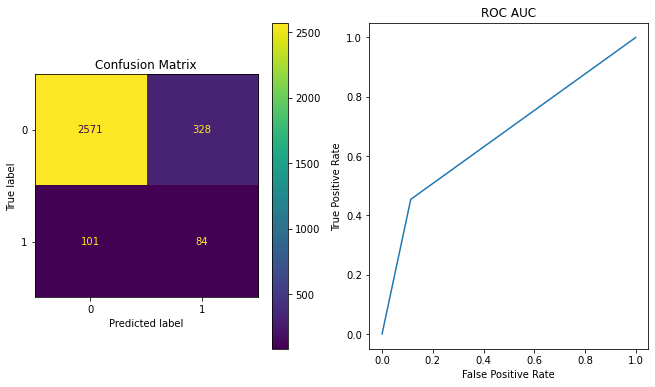

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2899
           1       0.20      0.45      0.28       185

    accuracy                           0.86      3084
   macro avg       0.58      0.67      0.60      3084
weighted avg       0.92      0.86      0.88      3084



In [113]:
analysis_model_with_test('random_forest_clf_under', random_forest_clf, x_test, y_test)

#### Grid Search CV on Random Forest

In [118]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [30]}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=5, scoring='accuracy')

In [119]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [30]},
             scoring='accuracy')

In [120]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 18,
 'max_features': 'sqrt',
 'n_estimators': 30}

Accuracy Score: 0.997986770204199
F1 Score: 0.9969762419006479
Recall Score: 0.9956859361518551
Precision Score: 0.9982698961937716
ROC AUC: 0.9974115616911131


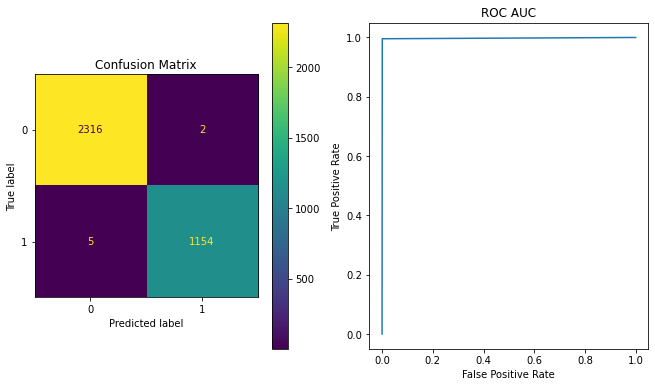

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [121]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8456549935149157
F1 Score: 0.2468354430379747
Recall Score: 0.42162162162162165
Precision Score: 0.174496644295302
ROC AUC: 0.6471681754192965


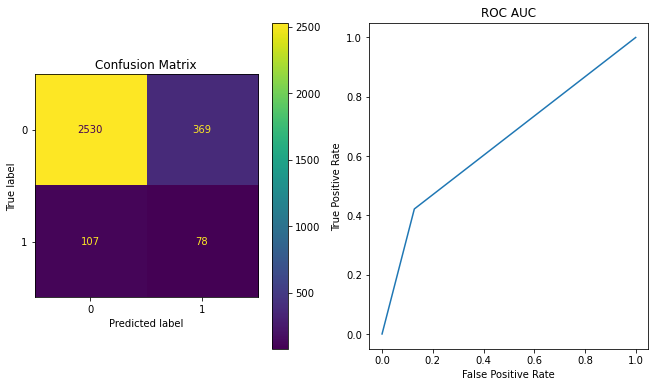

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      2899
           1       0.17      0.42      0.25       185

    accuracy                           0.85      3084
   macro avg       0.57      0.65      0.58      3084
weighted avg       0.91      0.85      0.87      3084



In [122]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

In [123]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [30]}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=10, scoring='f1')

In [124]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [30]},
             scoring='f1')

In [125]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 30}

Accuracy Score: 0.9847569744032212
F1 Score: 0.9772043010752688
Recall Score: 0.9801553062985332
Precision Score: 0.9742710120068611
ROC AUC: 0.983606557377049


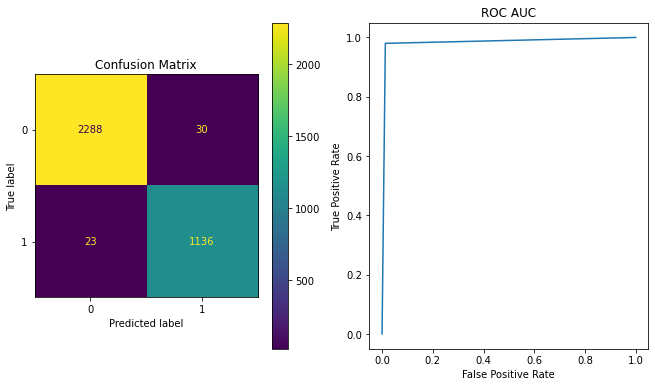

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2318
           1       0.97      0.98      0.98      1159

    accuracy                           0.98      3477
   macro avg       0.98      0.98      0.98      3477
weighted avg       0.98      0.98      0.98      3477



In [126]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.8381971465629053
F1 Score: 0.25854383358098065
Recall Score: 0.4702702702702703
Precision Score: 0.17827868852459017
ROC AUC: 0.6659733552110234


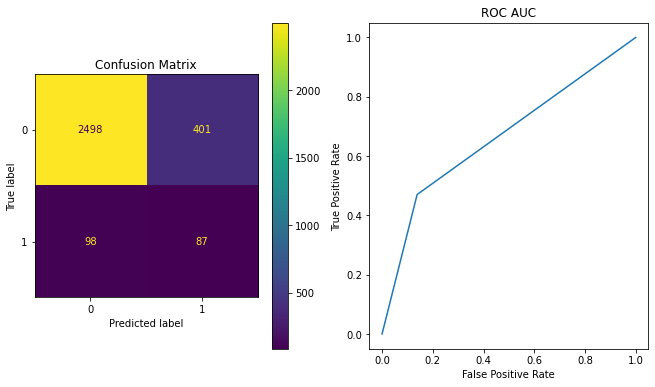

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2899
           1       0.18      0.47      0.26       185

    accuracy                           0.84      3084
   macro avg       0.57      0.67      0.58      3084
weighted avg       0.92      0.84      0.87      3084



In [127]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

In [128]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [35],
                   'class_weight': ['balanced', 'balanced_subsample']}
grid_search = GridSearchCV(estimator=random_forest_clf, param_grid=grid_parameters, cv=10, scoring='f1')

In [129]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [35]},
             scoring='f1')

In [130]:
grid_search.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'sqrt',
 'n_estimators': 35}

Accuracy Score: 0.9318377911993098
F1 Score: 0.9059150456530369
Recall Score: 0.9844693701466781
Precision Score: 0.8389705882352941
ROC AUC: 0.9449956859361518


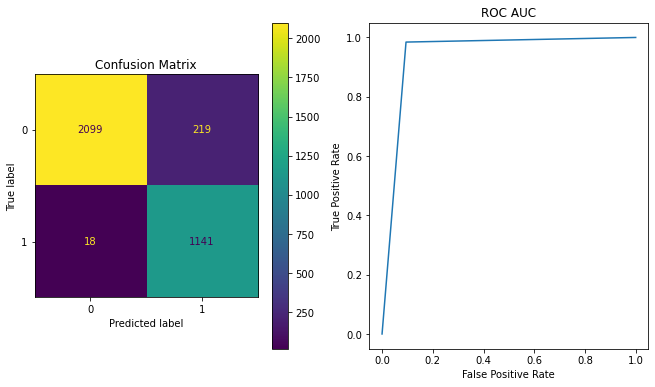

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2318
           1       0.84      0.98      0.91      1159

    accuracy                           0.93      3477
   macro avg       0.92      0.94      0.93      3477
weighted avg       0.94      0.93      0.93      3477



In [131]:
analysis_model_with_train('random_forest_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.7480544747081712
F1 Score: 0.25360230547550433
Recall Score: 0.7135135135135136
Precision Score: 0.1542056074766355
ROC AUC: 0.7318861117067396


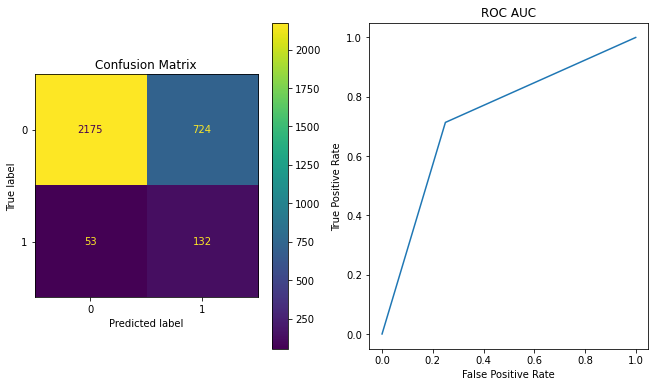

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      2899
           1       0.15      0.71      0.25       185

    accuracy                           0.75      3084
   macro avg       0.57      0.73      0.55      3084
weighted avg       0.93      0.75      0.81      3084



In [132]:
analysis_model_with_test('random_forest_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Extra Trees

In [133]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier()

In [134]:
extra_trees_clf.fit(x_under, y_under)

ExtraTreesClassifier()

Accuracy Score: 1.0
F1 Score: 1.0
Recall Score: 1.0
Precision Score: 1.0
ROC AUC: 1.0


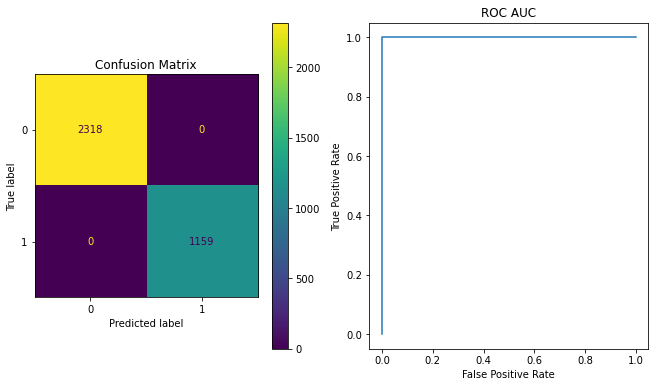

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [135]:
analysis_model_with_train('extra_trees_clf_under', extra_trees_clf, x_under, y_under)

Accuracy Score: 0.8573281452658884
F1 Score: 0.2715231788079471
Recall Score: 0.44324324324324327
Precision Score: 0.1957040572792363
ROC AUC: 0.6634981307627047


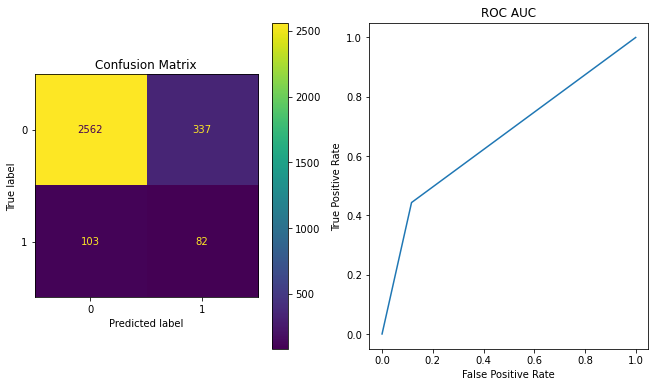

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2899
           1       0.20      0.44      0.27       185

    accuracy                           0.86      3084
   macro avg       0.58      0.66      0.60      3084
weighted avg       0.92      0.86      0.88      3084



In [136]:
analysis_model_with_test('extra_trees_clf_under', extra_trees_clf, x_test, y_test)

#### Grid Search CV on Extra Tree

In [138]:
grid_parameters = {'criterion':['gini', 'entropy'], 
                   'max_features': ['sqrt', 'log2'],  
                   'max_depth': np.arange(2, 21),
                   'n_estimators': [35],
                   'class_weight': ['balanced', 'balanced_subsample']}
grid_search = GridSearchCV(estimator=extra_trees_clf, param_grid=grid_parameters, cv=10, scoring='f1')

In [139]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=ExtraTreesClassifier(),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [35]},
             scoring='f1')

In [140]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'n_estimators': 35}

Accuracy Score: 0.9410411274086856
F1 Score: 0.918424194190211
Recall Score: 0.9956859361518551
Precision Score: 0.8522895125553914
ROC AUC: 0.954702329594478


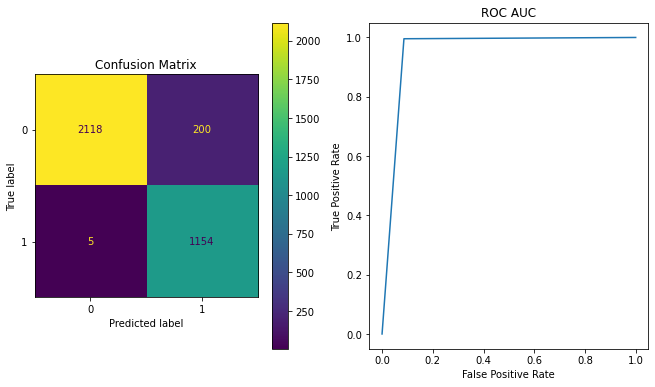

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      2318
           1       0.85      1.00      0.92      1159

    accuracy                           0.94      3477
   macro avg       0.92      0.95      0.94      3477
weighted avg       0.95      0.94      0.94      3477



In [141]:
analysis_model_with_train('extra_trees_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.7415693904020753
F1 Score: 0.2586046511627907
Recall Score: 0.7513513513513513
Precision Score: 0.15617977528089888
ROC AUC: 0.7461482524262792


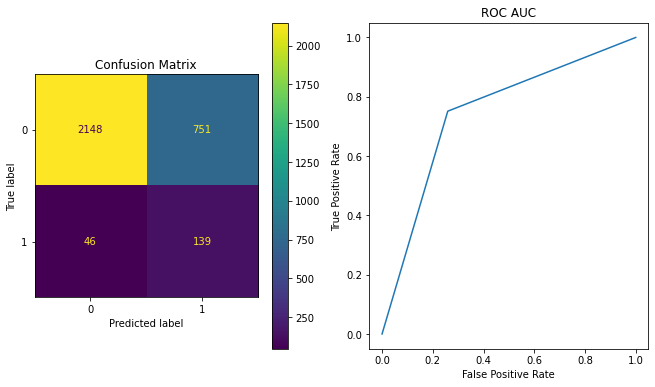

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2899
           1       0.16      0.75      0.26       185

    accuracy                           0.74      3084
   macro avg       0.57      0.75      0.55      3084
weighted avg       0.93      0.74      0.81      3084



In [142]:
analysis_model_with_test('extra_trees_clf_under', grid_search.best_estimator_, x_test, y_test)

#### KNN

In [143]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [144]:
knn_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.8564854759850445
F1 Score: 0.7959100204498978
Recall Score: 0.8395168248490078
Precision Score: 0.7566096423017107
ROC AUC: 0.8522433132010354


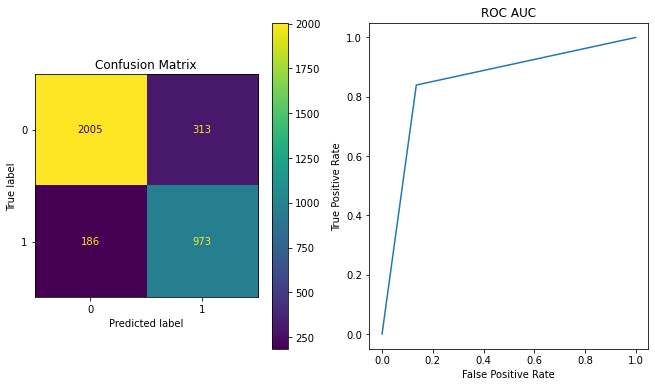

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2318
           1       0.76      0.84      0.80      1159

    accuracy                           0.86      3477
   macro avg       0.84      0.85      0.84      3477
weighted avg       0.86      0.86      0.86      3477



In [145]:
analysis_model_with_train('knn_clf_under', knn_clf, x_under, y_under)

Accuracy Score: 0.7837224383916991
F1 Score: 0.22711471610660489
Recall Score: 0.5297297297297298
Precision Score: 0.14454277286135694
ROC AUC: 0.6648303702115361


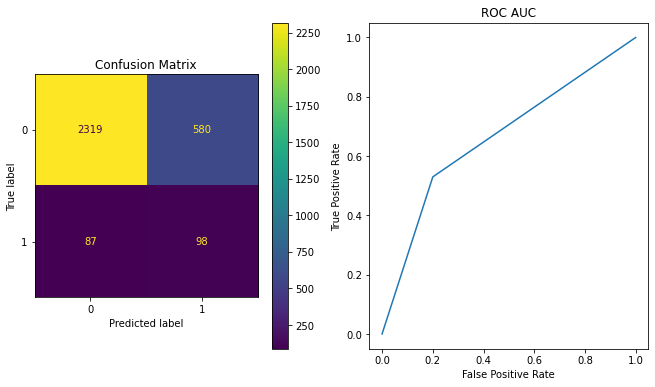

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      2899
           1       0.14      0.53      0.23       185

    accuracy                           0.78      3084
   macro avg       0.55      0.66      0.55      3084
weighted avg       0.91      0.78      0.84      3084



In [146]:
analysis_model_with_test('knn_clf_under', knn_clf, x_test, y_test)

### Naive Bayes

In [147]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [148]:
gaussian_nb_clf.fit(x_under, y_under)   

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.7109577221742882
F1 Score: 0.6657798470236115
Recall Score: 0.8636755823986195
Precision Score: 0.5416666666666666
ROC AUC: 0.7491371872303711


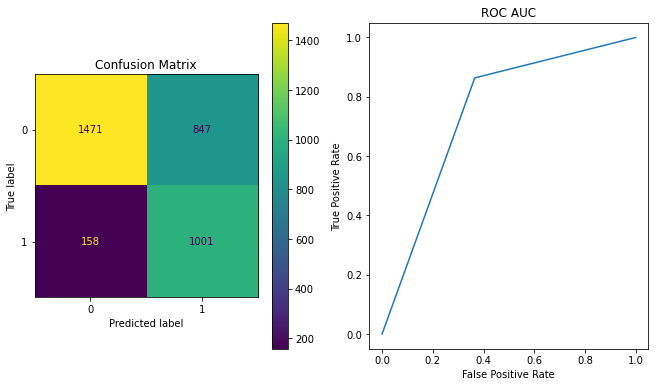

              precision    recall  f1-score   support

           0       0.90      0.63      0.75      2318
           1       0.54      0.86      0.67      1159

    accuracy                           0.71      3477
   macro avg       0.72      0.75      0.71      3477
weighted avg       0.78      0.71      0.72      3477



In [149]:
analysis_model_with_train('gaussian_nb_clf_under', gaussian_nb_clf, x_under, y_under)

Accuracy Score: 0.6335927367055771
F1 Score: 0.21636615811373092
Recall Score: 0.8432432432432433
Precision Score: 0.12410501193317422
ROC AUC: 0.7317285550469407


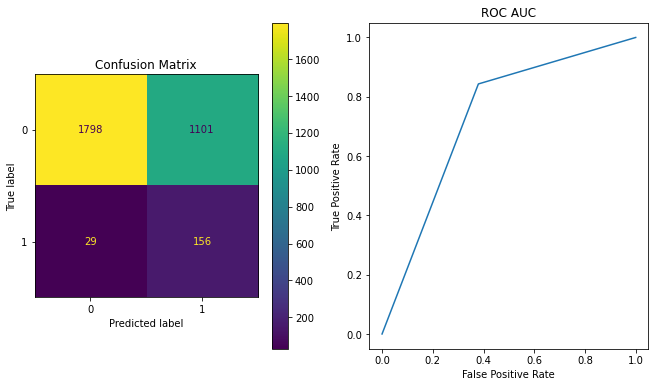

              precision    recall  f1-score   support

           0       0.98      0.62      0.76      2899
           1       0.12      0.84      0.22       185

    accuracy                           0.63      3084
   macro avg       0.55      0.73      0.49      3084
weighted avg       0.93      0.63      0.73      3084



In [150]:
analysis_model_with_test('gaussian_nb_clf_under', gaussian_nb_clf, x_test, y_test)

In [151]:
# Bernoulli NB
from sklearn.naive_bayes import BernoulliNB
ber_nb_clf = make_pipeline(StandardScaler(), BernoulliNB())

In [152]:
ber_nb_clf.fit(x_under, y_under)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7460454414725338
F1 Score: 0.6250530785562632
Recall Score: 0.635030198446937
Precision Score: 0.6153846153846154
ROC AUC: 0.7182916307161347


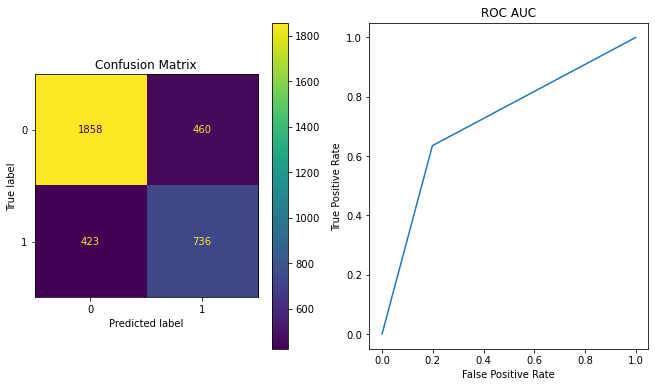

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2318
           1       0.62      0.64      0.63      1159

    accuracy                           0.75      3477
   macro avg       0.71      0.72      0.72      3477
weighted avg       0.75      0.75      0.75      3477



In [153]:
analysis_model_with_train('ber_nb_clf_under', ber_nb_clf, x_under, y_under)

Accuracy Score: 0.7642671854734111
F1 Score: 0.22411953041622196
Recall Score: 0.5675675675675675
Precision Score: 0.13962765957446807
ROC AUC: 0.6721935802653292


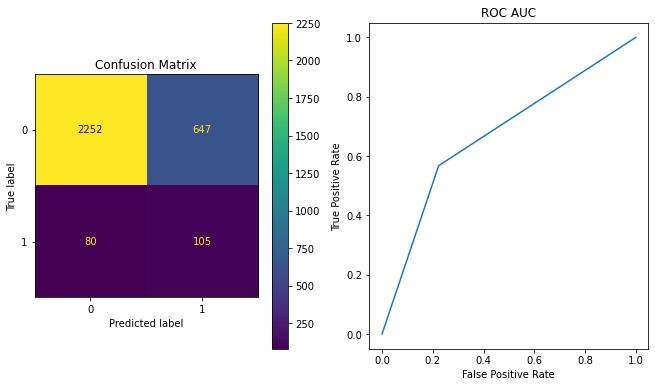

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      2899
           1       0.14      0.57      0.22       185

    accuracy                           0.76      3084
   macro avg       0.55      0.67      0.54      3084
weighted avg       0.92      0.76      0.82      3084



In [154]:
analysis_model_with_test('ber_nb_clf_under', ber_nb_clf, x_test, y_test)

#### AdaBoost

In [156]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.5)

In [157]:
ada_clf.fit(x_under, y_under)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

Accuracy Score: 0.7909117054932413
F1 Score: 0.6804395604395606
Recall Score: 0.6678170836928387
Precision Score: 0.6935483870967742
ROC AUC: 0.7601380500431407


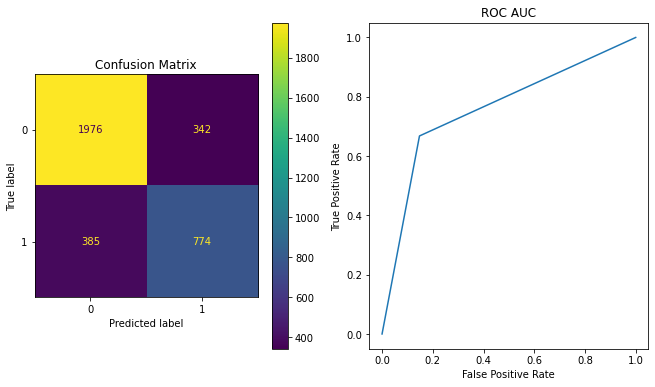

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2318
           1       0.69      0.67      0.68      1159

    accuracy                           0.79      3477
   macro avg       0.77      0.76      0.76      3477
weighted avg       0.79      0.79      0.79      3477



In [158]:
analysis_model_with_train('ada_clf_under', ada_clf, x_under, y_under)

Accuracy Score: 0.8038261997405967
F1 Score: 0.24090338770388958
Recall Score: 0.518918918918919
Precision Score: 0.1568627450980392
ROC AUC: 0.6704632538713257


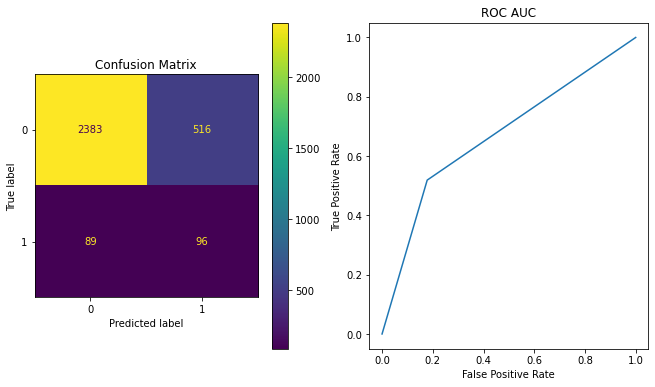

              precision    recall  f1-score   support

           0       0.96      0.82      0.89      2899
           1       0.16      0.52      0.24       185

    accuracy                           0.80      3084
   macro avg       0.56      0.67      0.56      3084
weighted avg       0.92      0.80      0.85      3084



In [159]:
analysis_model_with_test('ada_clf_under', ada_clf, x_test, y_test)

#### Grid Search CV on AdaBoost

In [160]:
grid_parameters = {'n_estimators':[300, 500, 700, 1000],
                   'learning_rate':[0.5, 1, 1.5, 2, 2.5]}

grid_search = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=grid_parameters, cv=10, scoring='f1') 

In [161]:
grid_search.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.5, 1, 1.5, 2, 2.5],
                         'n_estimators': [300, 500, 700, 1000]},
             scoring='f1')

In [162]:
grid_search.best_params_

{'learning_rate': 2, 'n_estimators': 300}

Accuracy Score: 0.7034800115041703
F1 Score: 0.6783151326053042
Recall Score: 0.9378774805867127
Precision Score: 0.5312805474095796
ROC AUC: 0.7620793787748059


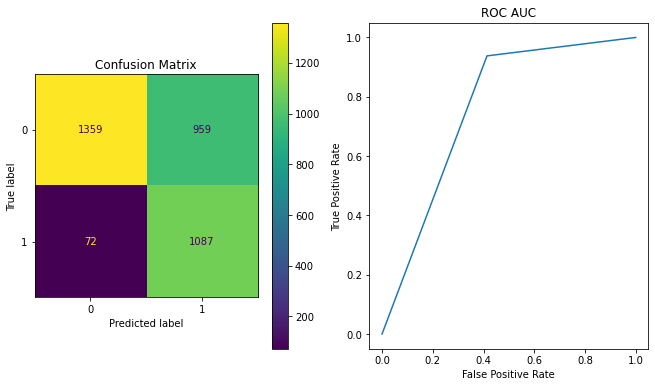

              precision    recall  f1-score   support

           0       0.95      0.59      0.72      2318
           1       0.53      0.94      0.68      1159

    accuracy                           0.70      3477
   macro avg       0.74      0.76      0.70      3477
weighted avg       0.81      0.70      0.71      3477



In [163]:
analysis_model_with_train('ada_clf_under', grid_search.best_estimator_, x_under, y_under)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


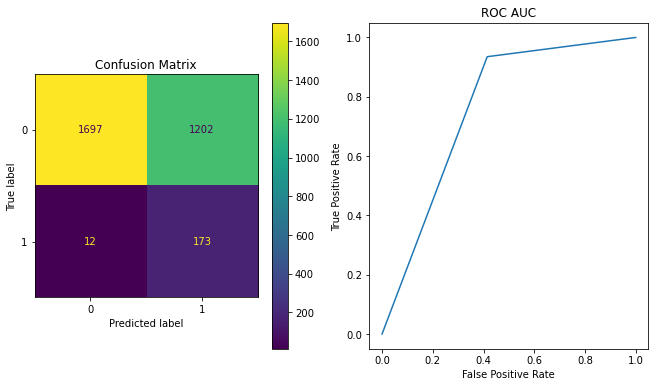

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [164]:
analysis_model_with_test('ada_clf_under', grid_search.best_estimator_, x_test, y_test)

#### Gradient Boosting

In [165]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

In [166]:
gb_clf.fit(x_under, y_under)

GradientBoostingClassifier()

Accuracy Score: 0.8372159907966638
F1 Score: 0.7515364354697104
Recall Score: 0.7385677308024159
Precision Score: 0.7649687220732797
ROC AUC: 0.8125539257981018


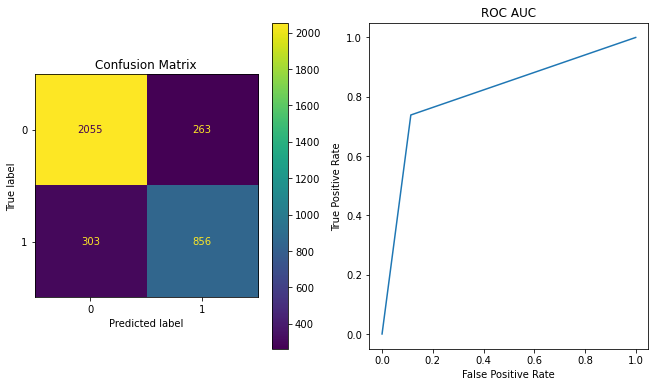

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      2318
           1       0.76      0.74      0.75      1159

    accuracy                           0.84      3477
   macro avg       0.82      0.81      0.82      3477
weighted avg       0.84      0.84      0.84      3477



In [167]:
analysis_model_with_train('gb_clf_under', gb_clf, x_under, y_under)

Accuracy Score: 0.8132295719844358
F1 Score: 0.2519480519480519
Recall Score: 0.5243243243243243
Precision Score: 0.1658119658119658
ROC AUC: 0.6779952080400511


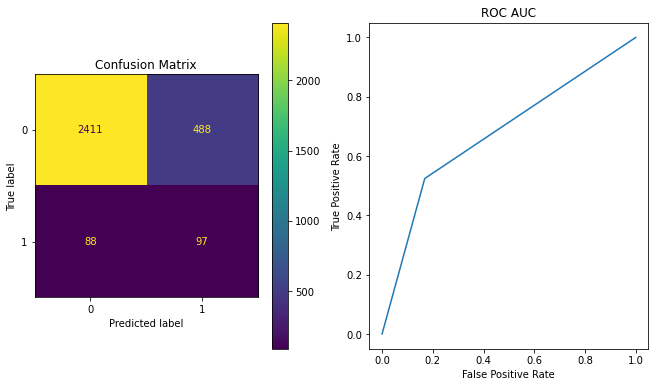

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2899
           1       0.17      0.52      0.25       185

    accuracy                           0.81      3084
   macro avg       0.57      0.68      0.57      3084
weighted avg       0.92      0.81      0.85      3084



In [168]:
analysis_model_with_test('gb_clf_under', gb_clf, x_test, y_test)

#### XG Boost

In [169]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()

In [170]:
xgb_clf.fit(x_under, y_under)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.998849582973828
F1 Score: 0.9982758620689656
Recall Score: 0.999137187230371
Precision Score: 0.9974160206718347
ROC AUC: 0.9989214840379638


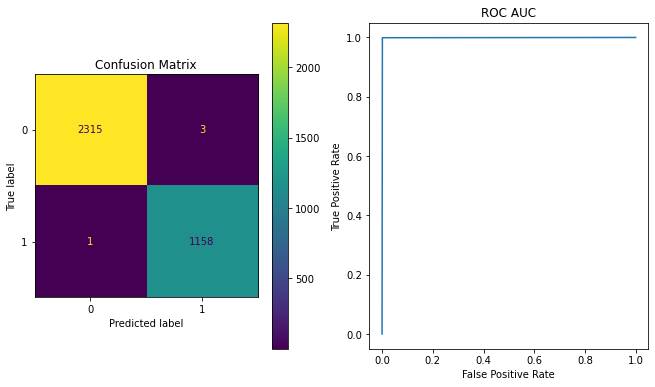

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2318
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      3477
   macro avg       1.00      1.00      1.00      3477
weighted avg       1.00      1.00      1.00      3477



In [171]:
analysis_model_with_train('xgb_clf_under', xgb_clf, x_under, y_under)

Accuracy Score: 0.8427367055771725
F1 Score: 0.27934621099554235
Recall Score: 0.5081081081081081
Precision Score: 0.19262295081967212
ROC AUC: 0.686099586996448


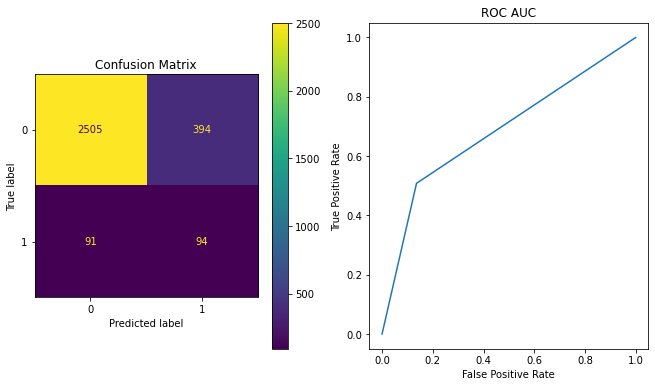

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      2899
           1       0.19      0.51      0.28       185

    accuracy                           0.84      3084
   macro avg       0.58      0.69      0.60      3084
weighted avg       0.92      0.84      0.87      3084



In [172]:
analysis_model_with_test('xgb_clf_under', xgb_clf, x_test, y_test)

### Training Model with Over Sampling

In [209]:
over_sampler = SMOTE()
x_over, y_over = over_sampler.fit_resample(x_train, y_train)
print(x_over.shape, y_over.shape)

(23194, 31) (23194,)


In [210]:
y_over.value_counts()

0    11597
1    11597
Name: FraudFound_P, dtype: int64

#### Logistic Regression

In [211]:
logistic_model = make_pipeline(StandardScaler(), LogisticRegression())

In [212]:
logistic_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

Accuracy Score: 0.8401741829783564
F1 Score: 0.846659772492244
Recall Score: 0.8824696042079848
Precision Score: 0.8136428685005566
ROC AUC: 0.8401741829783567


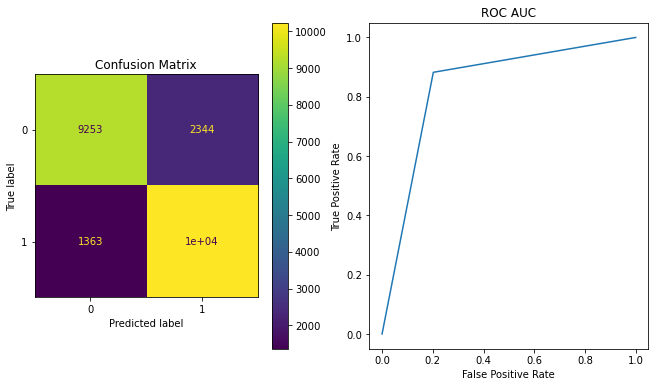

              precision    recall  f1-score   support

           0       0.87      0.80      0.83     11597
           1       0.81      0.88      0.85     11597

    accuracy                           0.84     23194
   macro avg       0.84      0.84      0.84     23194
weighted avg       0.84      0.84      0.84     23194



In [213]:
analysis_model_with_train('logistic_model_over', logistic_model, x_over, y_over)

Accuracy Score: 0.7739948119325551
F1 Score: 0.22469410456062294
Recall Score: 0.5459459459459459
Precision Score: 0.14145658263305322
ROC AUC: 0.6672468605204032


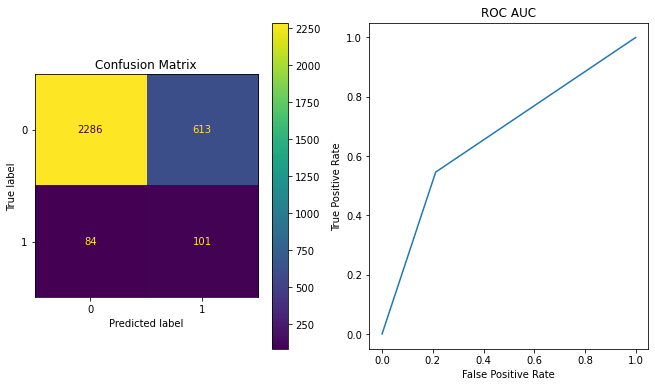

              precision    recall  f1-score   support

           0       0.96      0.79      0.87      2899
           1       0.14      0.55      0.22       185

    accuracy                           0.77      3084
   macro avg       0.55      0.67      0.55      3084
weighted avg       0.92      0.77      0.83      3084



In [214]:
analysis_model_with_test('logistic_model_over', logistic_model, x_test, y_test)

### SVM Classifiers

#### LinearSVC

In [215]:
linearSVC_model = make_pipeline(StandardScaler(), LinearSVC(dual=False))

In [216]:
linearSVC_model.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(dual=False))])

Accuracy Score: 0.8385358282314391
F1 Score: 0.8466106901494983
Recall Score: 0.8911787531258084
Precision Score: 0.8062880324543611
ROC AUC: 0.8385358282314391


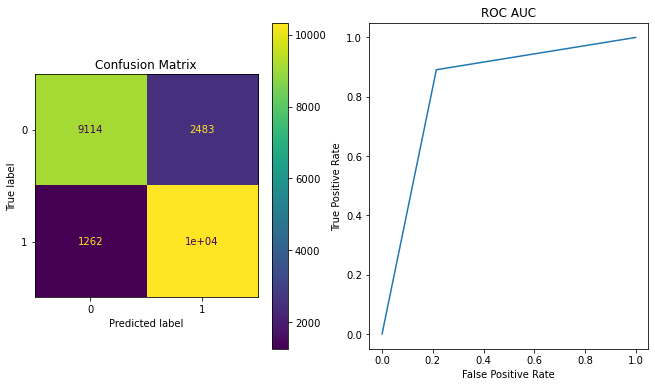

              precision    recall  f1-score   support

           0       0.88      0.79      0.83     11597
           1       0.81      0.89      0.85     11597

    accuracy                           0.84     23194
   macro avg       0.84      0.84      0.84     23194
weighted avg       0.84      0.84      0.84     23194



In [217]:
analysis_model_with_train('linearSVC_model_over', linearSVC_model, x_over, y_over)

Accuracy Score: 0.767833981841764
F1 Score: 0.22004357298474947
Recall Score: 0.5459459459459459
Precision Score: 0.1377899045020464
ROC AUC: 0.6639698684541734


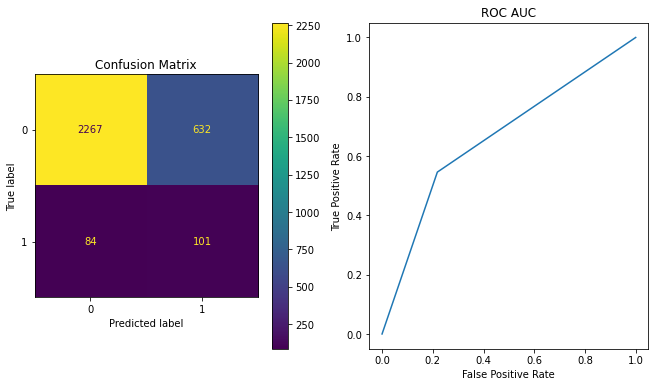

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      2899
           1       0.14      0.55      0.22       185

    accuracy                           0.77      3084
   macro avg       0.55      0.66      0.54      3084
weighted avg       0.91      0.77      0.83      3084



In [218]:
analysis_model_with_test('linearSVC_model_over', linearSVC_model, x_test, y_test)

#### SVC

In [219]:
# Polynomial kernel
poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='poly', degree=3, C=5))

In [411]:
params = {'coef0':[0.0,  0.2, 0.4, 0.6, 0.8, 1.0],
          'C':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 3.0, 5.0]}
stf = StratifiedKFold()
grid_search = GridSearchCV(estimator=poly_kernel_svm_clf, param_grid=params, scoring='f1', cv=stf)

In [412]:
grid_search.fit(x_over, y_over)

KeyboardInterrupt: 

In [220]:
poly_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, kernel='poly'))])

Accuracy Score: 0.9498577218246098
F1 Score: 0.9512062093559891
Recall Score: 0.9774941795291886
Precision Score: 0.9262951462657297
ROC AUC: 0.9498577218246097


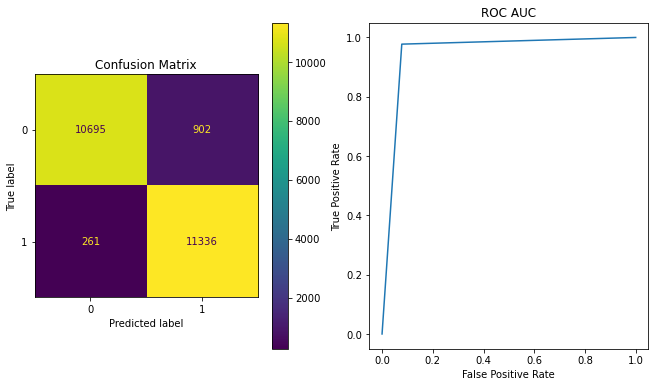

              precision    recall  f1-score   support

           0       0.98      0.92      0.95     11597
           1       0.93      0.98      0.95     11597

    accuracy                           0.95     23194
   macro avg       0.95      0.95      0.95     23194
weighted avg       0.95      0.95      0.95     23194



In [221]:
analysis_model_with_train('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8534370946822308
F1 Score: 0.25412541254125415
Recall Score: 0.41621621621621624
Precision Score: 0.1828978622327791
ROC AUC: 0.6487773043826855


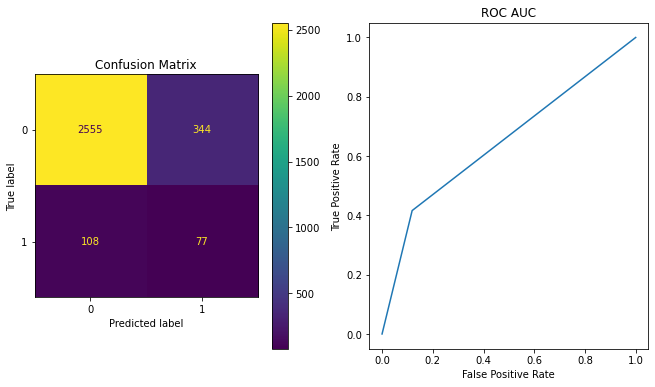

              precision    recall  f1-score   support

           0       0.96      0.88      0.92      2899
           1       0.18      0.42      0.25       185

    accuracy                           0.85      3084
   macro avg       0.57      0.65      0.59      3084
weighted avg       0.91      0.85      0.88      3084



In [222]:
analysis_model_with_test('poly_kernel_svm_clf_over', poly_kernel_svm_clf, x_test, y_test)

In [223]:
# RBF Kernel
rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

In [224]:
rbf_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

Accuracy Score: 0.9389497283780288
F1 Score: 0.9404140717051002
Recall Score: 0.9635250495817884
Precision Score: 0.9183857976493794
ROC AUC: 0.9389497283780288


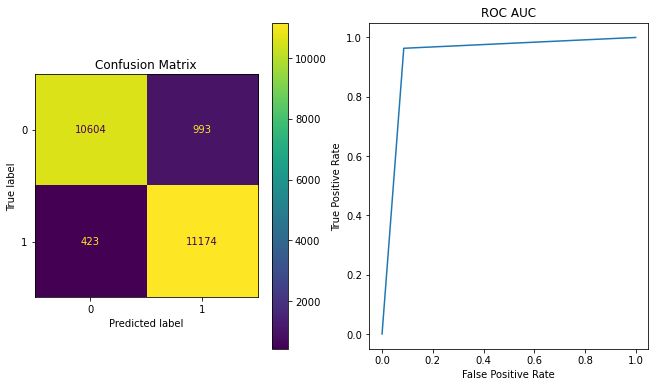

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     11597
           1       0.92      0.96      0.94     11597

    accuracy                           0.94     23194
   macro avg       0.94      0.94      0.94     23194
weighted avg       0.94      0.94      0.94     23194



In [227]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.8641374837872893
F1 Score: 0.2584070796460177
Recall Score: 0.3945945945945946
Precision Score: 0.19210526315789472
ROC AUC: 0.6443480044376905


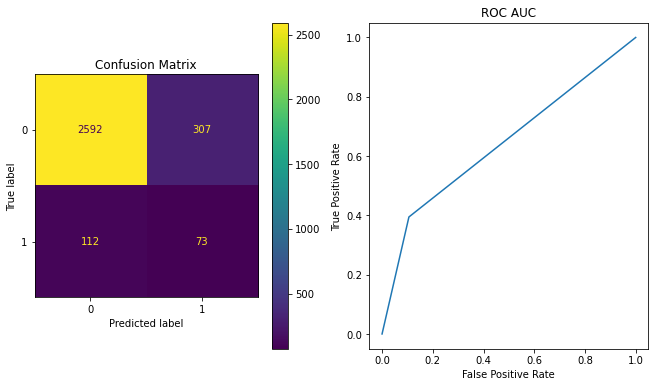

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      2899
           1       0.19      0.39      0.26       185

    accuracy                           0.86      3084
   macro avg       0.58      0.64      0.59      3084
weighted avg       0.91      0.86      0.89      3084



In [226]:
analysis_model_with_test('rbf_kernel_svm_clf_over', rbf_kernel_svm_clf, x_test, y_test)

In [228]:
# Sigmoid Kernel
sigmoid_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel='sigmoid'))

In [229]:
sigmoid_kernel_svm_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='sigmoid'))])

Accuracy Score: 0.727429507631284
F1 Score: 0.7273119392684609
Recall Score: 0.7269983616452531
Precision Score: 0.7276257875204971
ROC AUC: 0.727429507631284


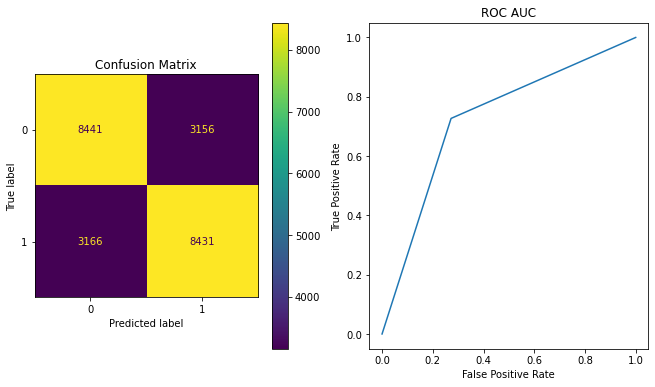

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11597
           1       0.73      0.73      0.73     11597

    accuracy                           0.73     23194
   macro avg       0.73      0.73      0.73     23194
weighted avg       0.73      0.73      0.73     23194



In [230]:
analysis_model_with_train('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_over, y_over)

Accuracy Score: 0.7263294422827496
F1 Score: 0.18689788053949905
Recall Score: 0.5243243243243243
Precision Score: 0.11371629542790153
ROC AUC: 0.6317723725795474


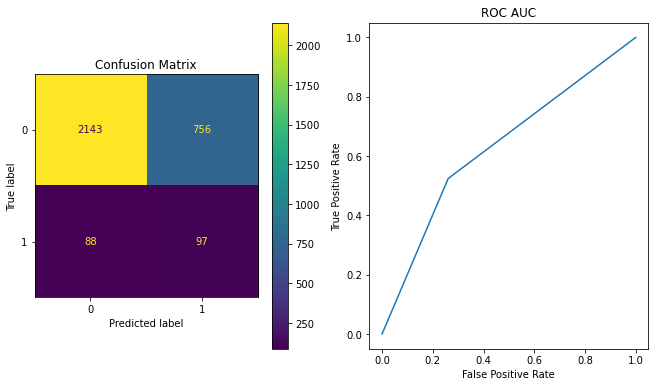

              precision    recall  f1-score   support

           0       0.96      0.74      0.84      2899
           1       0.11      0.52      0.19       185

    accuracy                           0.73      3084
   macro avg       0.54      0.63      0.51      3084
weighted avg       0.91      0.73      0.80      3084



In [231]:
analysis_model_with_test('sigmoid_kernel_svm_clf_over', sigmoid_kernel_svm_clf, x_test, y_test)

#### Decision Tree

In [232]:
decision_tree_clf = DecisionTreeClassifier(max_depth=2)

In [233]:
decision_tree_clf.fit(x_over, y_over)

DecisionTreeClassifier(max_depth=2)

Accuracy Score: 0.7690350952832629
F1 Score: 0.8060814479638009
Recall Score: 0.9600758816935414
Precision Score: 0.6946593461442475
ROC AUC: 0.769035095283263


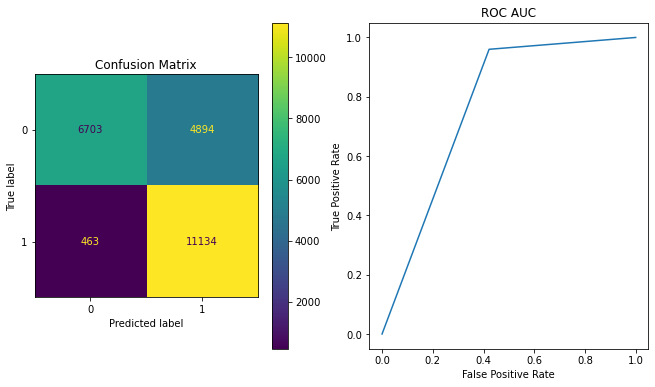

              precision    recall  f1-score   support

           0       0.94      0.58      0.71     11597
           1       0.69      0.96      0.81     11597

    accuracy                           0.77     23194
   macro avg       0.82      0.77      0.76     23194
weighted avg       0.82      0.77      0.76     23194



In [234]:
analysis_model_with_train('decision_tree_clf_over', decision_tree_clf, x_over, y_over)

Accuracy Score: 0.606355382619974
F1 Score: 0.2217948717948718
Recall Score: 0.9351351351351351
Precision Score: 0.12581818181818183
ROC AUC: 0.7602547010618761


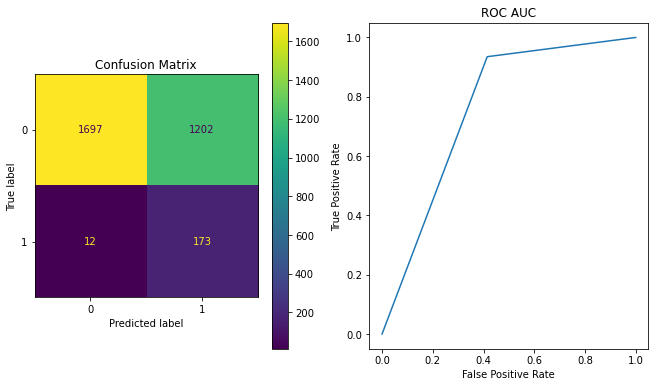

              precision    recall  f1-score   support

           0       0.99      0.59      0.74      2899
           1       0.13      0.94      0.22       185

    accuracy                           0.61      3084
   macro avg       0.56      0.76      0.48      3084
weighted avg       0.94      0.61      0.71      3084



In [235]:
analysis_model_with_test('decision_tree_clf_over', decision_tree_clf, x_test, y_test)

#### Grid Search CV on Decision Tree

In [236]:
grid_parameters = {'criterion':['gini','entropy'], 'max_depth': np.arange(2, 21)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid_parameters, cv=5, scoring='f1')

In [237]:
grid_search.fit(x_over, y_over)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])},
             scoring='f1')

In [238]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20}

Accuracy Score: 0.9889626627576097
F1 Score: 0.9890457851946941
Recall Score: 0.996550832111753
Precision Score: 0.9816529346810499
ROC AUC: 0.9889626627576097


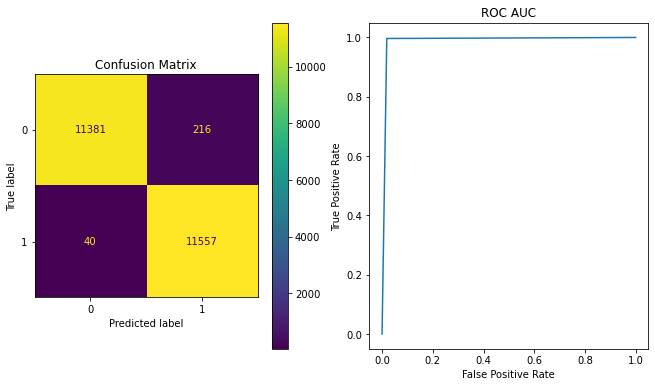

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     11597
           1       0.98      1.00      0.99     11597

    accuracy                           0.99     23194
   macro avg       0.99      0.99      0.99     23194
weighted avg       0.99      0.99      0.99     23194



In [239]:
analysis_model_with_train('decision_tree_clf_over', grid_search.best_estimator_, x_over, y_over)

Accuracy Score: 0.8595979247730221
F1 Score: 0.2281639928698752
Recall Score: 0.34594594594594597
Precision Score: 0.1702127659574468
ROC AUC: 0.6191613137801479


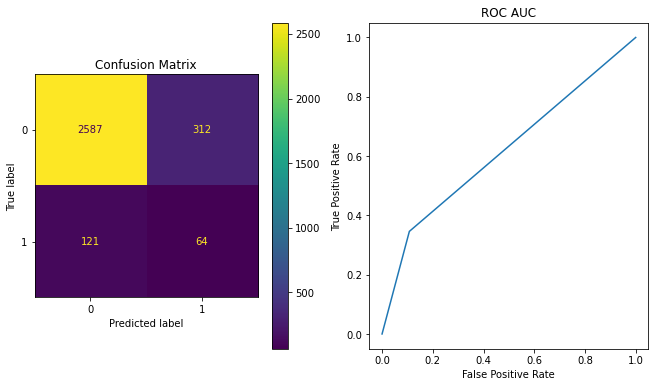

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2899
           1       0.17      0.35      0.23       185

    accuracy                           0.86      3084
   macro avg       0.56      0.62      0.58      3084
weighted avg       0.91      0.86      0.88      3084



In [240]:
analysis_model_with_test('decision_tree_clf_over', grid_search.best_estimator_, x_test, y_test)

#### Random Forest

In [241]:
random_forest_clf = RandomForestClassifier(max_depth=17)

In [243]:
random_forest_clf.fit(x_over, y_over) 

RandomForestClassifier(max_depth=17)

Accuracy Score: 0.9819780977839097
F1 Score: 0.9822941375804811
Recall Score: 0.9998275416055876
Precision Score: 0.9653650820081592
ROC AUC: 0.9819780977839097


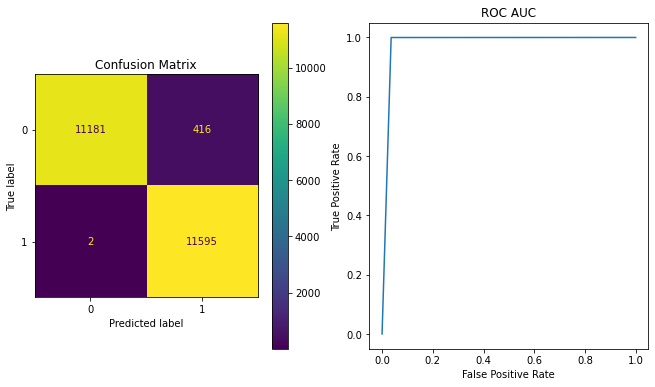

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     11597
           1       0.97      1.00      0.98     11597

    accuracy                           0.98     23194
   macro avg       0.98      0.98      0.98     23194
weighted avg       0.98      0.98      0.98     23194



In [244]:
analysis_model_with_train('random_forest_clf_over', random_forest_clf, x_over, y_over)

Accuracy Score: 0.8855382619974059
F1 Score: 0.23427331887201738
Recall Score: 0.2918918918918919
Precision Score: 0.1956521739130435
ROC AUC: 0.6076568807510513


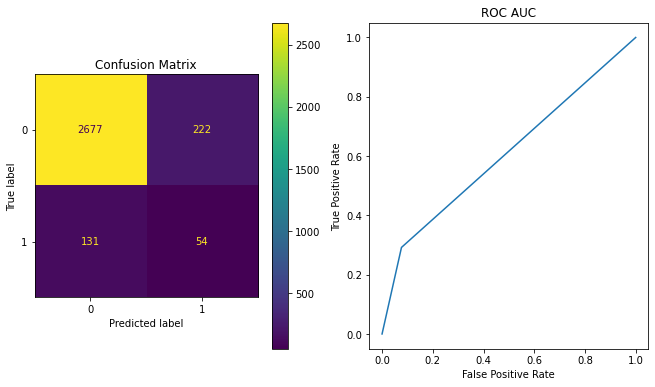

              precision    recall  f1-score   support

           0       0.95      0.92      0.94      2899
           1       0.20      0.29      0.23       185

    accuracy                           0.89      3084
   macro avg       0.57      0.61      0.59      3084
weighted avg       0.91      0.89      0.90      3084



In [245]:
analysis_model_with_test('random_forest_clf_over', random_forest_clf, x_test, y_test)

#### Extra Trees

In [246]:
extra_trees_clf = ExtraTreesClassifier(max_depth=12)

In [247]:
extra_trees_clf.fit(x_over, y_over)

ExtraTreesClassifier(max_depth=12)

Accuracy Score: 0.9250668276278348
F1 Score: 0.9290959530026108
Recall Score: 0.9818918685867034
Precision Score: 0.8816879597367402
ROC AUC: 0.9250668276278348


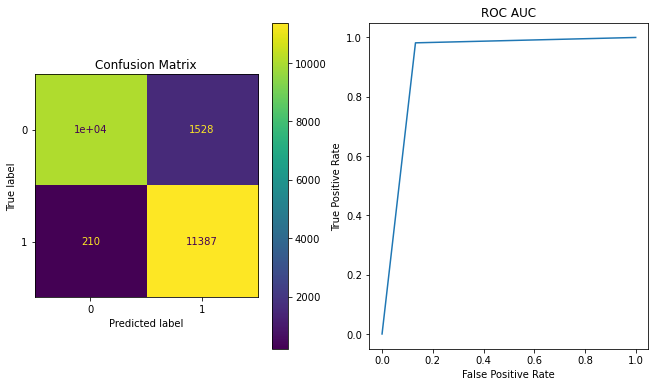

              precision    recall  f1-score   support

           0       0.98      0.87      0.92     11597
           1       0.88      0.98      0.93     11597

    accuracy                           0.93     23194
   macro avg       0.93      0.93      0.92     23194
weighted avg       0.93      0.93      0.92     23194



In [248]:
analysis_model_with_train('extra_trees_clf_over', extra_trees_clf, x_over, y_over)

Accuracy Score: 0.8132295719844358
F1 Score: 0.25000000000000006
Recall Score: 0.518918918918919
Precision Score: 0.1646655231560892
ROC AUC: 0.675464978603992


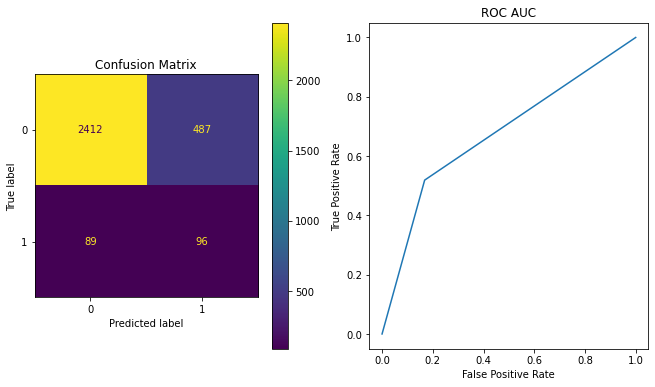

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      2899
           1       0.16      0.52      0.25       185

    accuracy                           0.81      3084
   macro avg       0.56      0.68      0.57      3084
weighted avg       0.92      0.81      0.85      3084



In [249]:
analysis_model_with_test('extra_trees_clf_over', extra_trees_clf, x_test, y_test)

#### KNN

In [250]:
knn_clf = make_pipeline(StandardScaler(), KNeighborsClassifier())

In [251]:
knn_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

Accuracy Score: 0.9259722341984996
F1 Score: 0.9308637004227903
Recall Score: 0.9967232905061654
Precision Score: 0.8731681522888654
ROC AUC: 0.9259722341984996


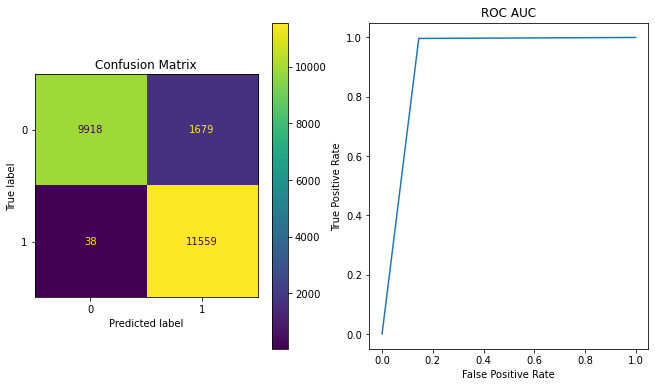

              precision    recall  f1-score   support

           0       1.00      0.86      0.92     11597
           1       0.87      1.00      0.93     11597

    accuracy                           0.93     23194
   macro avg       0.93      0.93      0.93     23194
weighted avg       0.93      0.93      0.93     23194



In [252]:
analysis_model_with_train('knn_clf_over', knn_clf, x_over, y_over)

Accuracy Score: 0.7921530479896238
F1 Score: 0.2520420070011669
Recall Score: 0.5837837837837838
Precision Score: 0.16071428571428573
ROC AUC: 0.6946169695048618


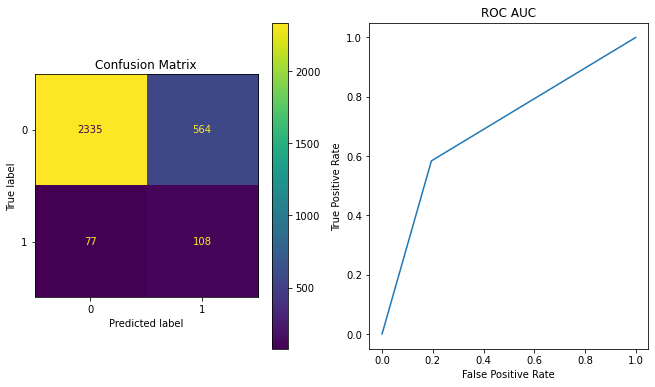

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      2899
           1       0.16      0.58      0.25       185

    accuracy                           0.79      3084
   macro avg       0.56      0.69      0.57      3084
weighted avg       0.92      0.79      0.84      3084



In [253]:
analysis_model_with_test('knn_clf_over', knn_clf, x_test, y_test)

#### Naive Bayes

In [254]:
# Gaussian NB
gaussian_nb_clf = make_pipeline(StandardScaler(),  GaussianNB())

In [255]:
gaussian_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gaussiannb', GaussianNB())])

Accuracy Score: 0.7666637923600931
F1 Score: 0.8023663453111306
Recall Score: 0.9473139605070277
Precision Score: 0.6958890226135428
ROC AUC: 0.7666637923600932


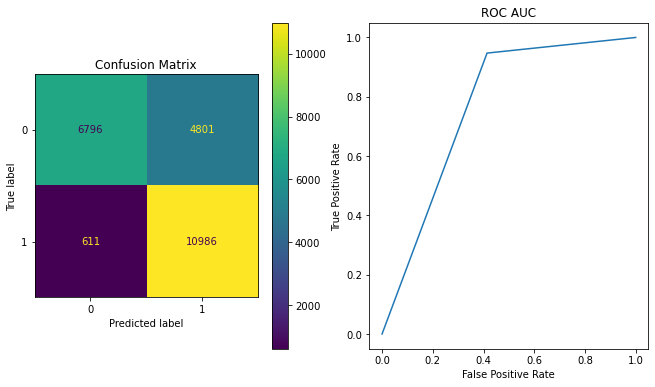

              precision    recall  f1-score   support

           0       0.92      0.59      0.72     11597
           1       0.70      0.95      0.80     11597

    accuracy                           0.77     23194
   macro avg       0.81      0.77      0.76     23194
weighted avg       0.81      0.77      0.76     23194



In [256]:
analysis_model_with_train('gaussian_nb_clf_over', gaussian_nb_clf, x_over, y_over)

Accuracy Score: 0.6018158236057068
F1 Score: 0.19633507853403143
Recall Score: 0.8108108108108109
Precision Score: 0.11169024571854058
ROC AUC: 0.6996447982995068


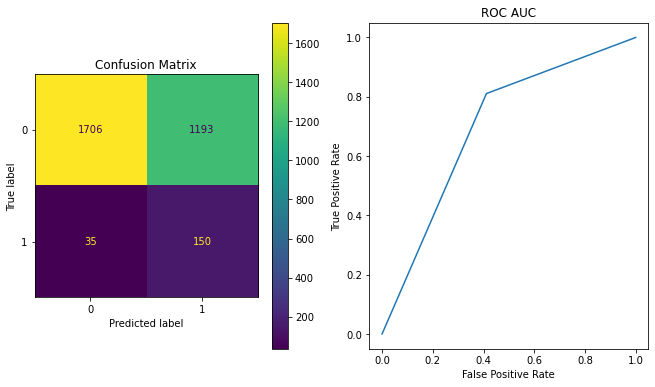

              precision    recall  f1-score   support

           0       0.98      0.59      0.74      2899
           1       0.11      0.81      0.20       185

    accuracy                           0.60      3084
   macro avg       0.55      0.70      0.47      3084
weighted avg       0.93      0.60      0.70      3084



In [257]:
analysis_model_with_test('gaussian_nb_clf_over', gaussian_nb_clf, x_test, y_test)

In [258]:
# Bernoulli NB
ber_nb_clf = make_pipeline(StandardScaler(),  BernoulliNB())

In [259]:
ber_nb_clf.fit(x_over, y_over)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bernoullinb', BernoulliNB())])

Accuracy Score: 0.7846425799775804
F1 Score: 0.7921953654782212
Recall Score: 0.8209881865999827
Precision Score: 0.7653536977491961
ROC AUC: 0.7846425799775805


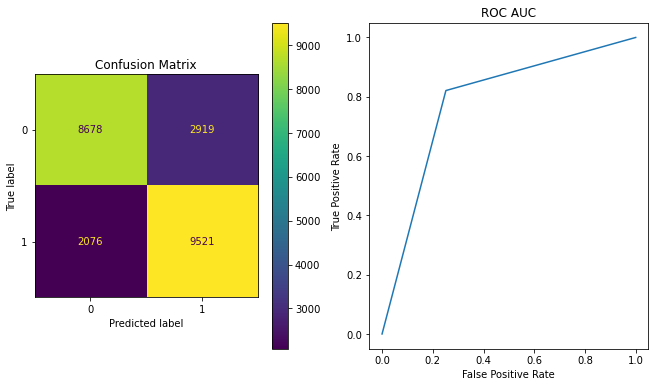

              precision    recall  f1-score   support

           0       0.81      0.75      0.78     11597
           1       0.77      0.82      0.79     11597

    accuracy                           0.78     23194
   macro avg       0.79      0.78      0.78     23194
weighted avg       0.79      0.78      0.78     23194



In [260]:
analysis_model_with_train('ber_nb_clf_over', ber_nb_clf, x_over, y_over)

Accuracy Score: 0.7344357976653697
F1 Score: 0.21174205967276227
Recall Score: 0.5945945945945946
Precision Score: 0.1288056206088993
ROC AUC: 0.6689771869144067


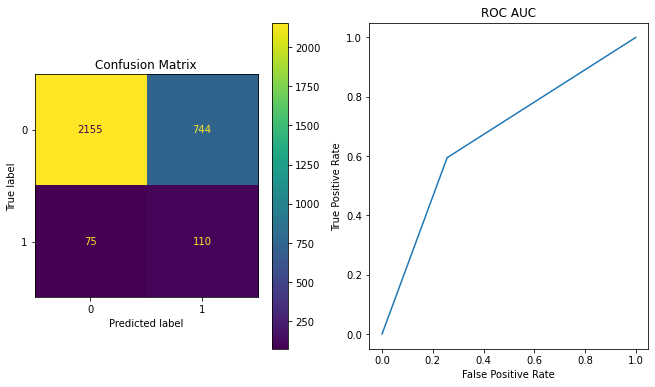

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      2899
           1       0.13      0.59      0.21       185

    accuracy                           0.73      3084
   macro avg       0.55      0.67      0.53      3084
weighted avg       0.92      0.73      0.80      3084



In [261]:
analysis_model_with_test('ber_nb_clf_over', ber_nb_clf, x_test, y_test)

#### Ada Boost

In [262]:
ada_clf = AdaBoostClassifier(n_estimators=500, learning_rate=0.5)

In [263]:
ada_clf.fit(x_over, y_over)

AdaBoostClassifier(learning_rate=0.5, n_estimators=500)

Accuracy Score: 0.8907907217383806
F1 Score: 0.8940566313940357
Recall Score: 0.9216176597395879
Precision Score: 0.8680961663417803
ROC AUC: 0.8907907217383806


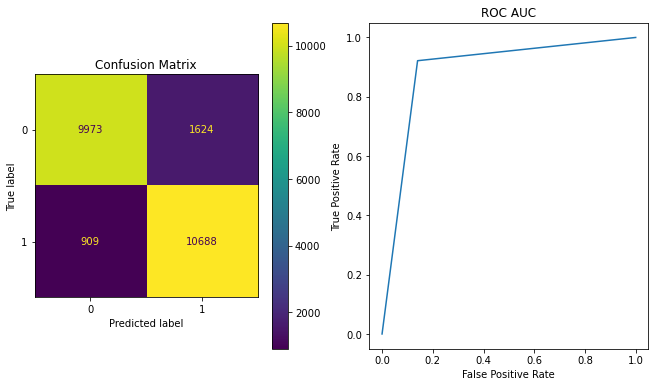

              precision    recall  f1-score   support

           0       0.92      0.86      0.89     11597
           1       0.87      0.92      0.89     11597

    accuracy                           0.89     23194
   macro avg       0.89      0.89      0.89     23194
weighted avg       0.89      0.89      0.89     23194



In [264]:
analysis_model_with_train('ada_clf_over', ada_clf, x_over, y_over)

Accuracy Score: 0.8304150453955902
F1 Score: 0.2364963503649635
Recall Score: 0.43783783783783786
Precision Score: 0.162
ROC AUC: 0.6466526201952211


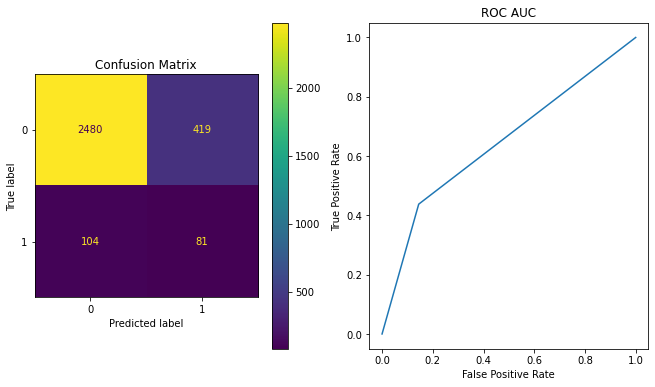

              precision    recall  f1-score   support

           0       0.96      0.86      0.90      2899
           1       0.16      0.44      0.24       185

    accuracy                           0.83      3084
   macro avg       0.56      0.65      0.57      3084
weighted avg       0.91      0.83      0.86      3084



In [265]:
analysis_model_with_test('ada_clf_over', ada_clf, x_test, y_test)

#### Gradient Boosting

In [266]:
gb_clf = GradientBoostingClassifier()

In [267]:
gb_clf.fit(x_over, y_over)

GradientBoostingClassifier()

Accuracy Score: 0.9013106837975339
F1 Score: 0.9051741994283111
Recall Score: 0.9420539794774511
Precision Score: 0.8710731940679317
ROC AUC: 0.9013106837975339


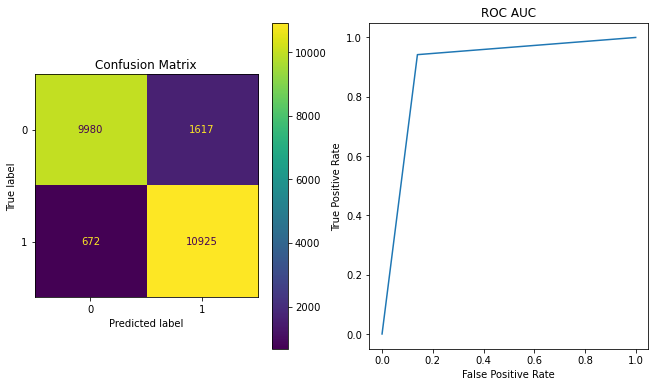

              precision    recall  f1-score   support

           0       0.94      0.86      0.90     11597
           1       0.87      0.94      0.91     11597

    accuracy                           0.90     23194
   macro avg       0.90      0.90      0.90     23194
weighted avg       0.90      0.90      0.90     23194



In [268]:
analysis_model_with_train('gb_clf_over', gb_clf, x_over, y_over)

Accuracy Score: 0.8249027237354085
F1 Score: 0.26027397260273977
Recall Score: 0.5135135135135135
Precision Score: 0.1743119266055046
ROC AUC: 0.6791437867671052


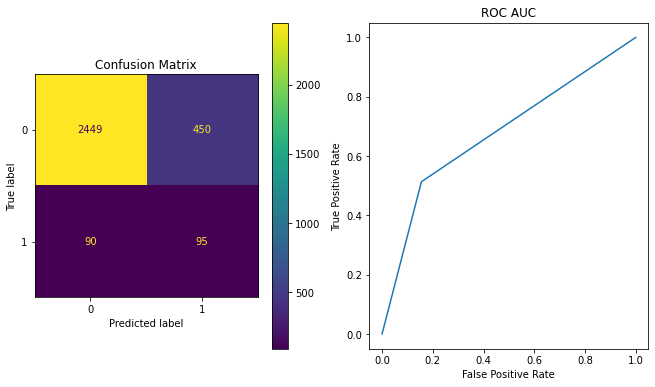

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2899
           1       0.17      0.51      0.26       185

    accuracy                           0.82      3084
   macro avg       0.57      0.68      0.58      3084
weighted avg       0.92      0.82      0.86      3084



In [269]:
analysis_model_with_test('gb_clf_over', gb_clf, x_test, y_test)

#### XG Boost

In [270]:
xgb_clf = XGBClassifier()

In [272]:
xgb_clf.fit(x_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Accuracy Score: 0.9862895576442183
F1 Score: 0.9862456747404844
Recall Score: 0.98309907734759
Precision Score: 0.989412479389048
ROC AUC: 0.9862895576442183


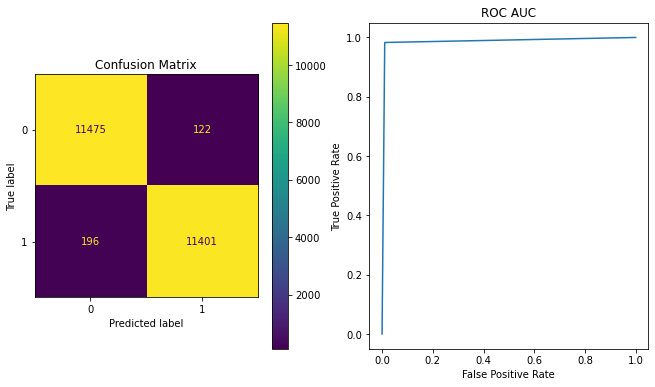

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     11597
           1       0.99      0.98      0.99     11597

    accuracy                           0.99     23194
   macro avg       0.99      0.99      0.99     23194
weighted avg       0.99      0.99      0.99     23194



In [273]:
analysis_model_with_train('xgb_clf_over', xgb_clf, x_over, y_over)

Accuracy Score: 0.9150453955901426
F1 Score: 0.22023809523809526
Recall Score: 0.2
Precision Score: 0.24503311258278146
ROC AUC: 0.5803380476026216


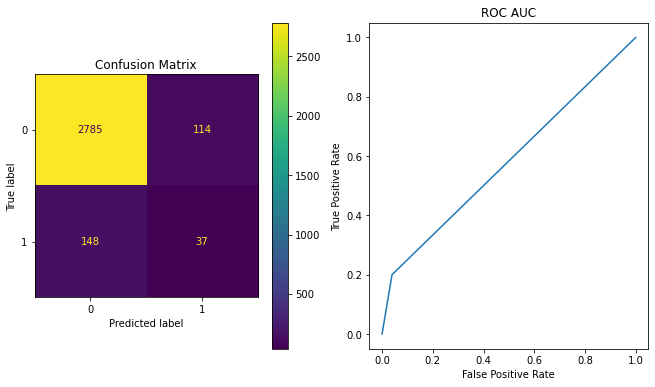

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      2899
           1       0.25      0.20      0.22       185

    accuracy                           0.92      3084
   macro avg       0.60      0.58      0.59      3084
weighted avg       0.91      0.92      0.91      3084



In [274]:
analysis_model_with_test('xgb_clf_over', xgb_clf, x_test, y_test)